# Loan Tap
- LoanTap is an online platform committed to delivering customized loan products to millennials
- LoanTap deploys formal credit to salaried individuals and businesses 4 main financial instruments:
    - Personal Loan
    - EMI Free Loan
    - Personal Overdraft
    - Advance Salary Loan

# Objective of the case study
- Given a set of attributes for an Individual, determine if a credit line should be extended to them. If so, what should the repayment terms be in business recommendations?
- This case study will focus only on the underwriting process behind Personal Loan only

# Approach
- Basic Data Analysis
- Exploratory Data Analysis
    - Univariate, Bivariate, Multivariate Analysis
    - Target vs Features
- Data Preprocessing
- Statistical Tests
    - Chisquare, Anova Test
- Modeling
- Assumptions of Linear Regression

In [321]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy.stats import skew, kurtosis
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, KFold
from statsmodels.stats.outliers_influence import variance_inflation_factor
bold_start = '\033[1m'
bold_end = '\033[0m'

In [2]:
#Load Dataset
path = r"F:\Muthu_2023\Personal\NextStep\DSCourse\Scaler\Business-Case-Study\LoanTap\Dataset"
#path = r"E:\Nextstep\Scaler\Business-Case-Study\LoanTap\Dataset"
raw_df = pd.read_csv(path + "\logistic_regression.csv")
pd.options.display.max_columns = raw_df.shape[1]
raw_df.head()

loan_amnt        term  int_rate  installment grade sub_grade  \
0    10000.0   36 months     11.44       329.48     B        B4   
1     8000.0   36 months     11.99       265.68     B        B5   
2    15600.0   36 months     10.49       506.97     B        B3   
3     7200.0   36 months      6.49       220.65     A        A2   
4    24375.0   60 months     17.27       609.33     C        C5   

                 emp_title emp_length home_ownership  annual_inc  \
0                Marketing  10+ years           RENT    117000.0   
1          Credit analyst     4 years       MORTGAGE     65000.0   
2             Statistician   < 1 year           RENT     43057.0   
3          Client Advocate    6 years           RENT     54000.0   
4  Destiny Management Inc.    9 years       MORTGAGE     55000.0   

  verification_status   issue_d  loan_status             purpose  \
0        Not Verified  Jan-2015   Fully Paid            vacation   
1        Not Verified  Jan-2015   Fully Paid  debt_consolidation   
2     Source Verified  Jan-2015   Fully Paid         credit_card   
3        Not Verified  Nov-2014   Fully Paid         credit_card   
4            Verified  Apr-2013  Charged Off         credit_card   

                     title    dti earliest_cr_line  open_acc  pub_rec  \
0                 Vacation  26.24         Jun-1990      16.0      0.0   
1       Debt consolidation  22.05         Jul-2004      17.0      0.0   
2  Credit card refinancing  12.79         Aug-2007      13.0      0.0   
3  Credit card refinancing   2.60         Sep-2006       6.0      0.0   
4    Credit Card Refinance  33.95         Mar-1999      13.0      0.0   

   revol_bal  revol_util  total_acc initial_list_status application_type  \
0    36369.0        41.8       25.0                   w       INDIVIDUAL   
1    20131.0        53.3       27.0                   f       INDIVIDUAL   
2    11987.0        92.2       26.0                   f       INDIVIDUAL   
3     5472.0        21.5       13.0                   f       INDIVIDUAL   
4    24584.0        69.8       43.0                   f       INDIVIDUAL   

   mort_acc  pub_rec_bankruptcies  \
0       0.0                   0.0   
1       3.0                   0.0   
2       0.0                   0.0   
3       0.0                   0.0   
4       1.0                   0.0   

                                             address  
0     0174 Michelle Gateway\r\nMendozaberg, OK 22690  
1  1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113  
2  87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113  
3            823 Reid Ford\r\nDelacruzside, MA 00813  
4             679 Luna Roads\r\nGreggshire, VA 11650

# Data Analysis

In [27]:
#Statistics of Dataset
pd.options.display.max_columns = raw_df.shape[1]
raw_df.describe(include='all')

loan_amnt        term       int_rate    installment   grade  \
count   396030.000000      396030  396030.000000  396030.000000  396030   
unique            NaN           2            NaN            NaN       7   
top               NaN   36 months            NaN            NaN       B   
freq              NaN      302005            NaN            NaN  116018   
mean     14113.888089         NaN      13.639400     431.849698     NaN   
std       8357.441341         NaN       4.472157     250.727790     NaN   
min        500.000000         NaN       5.320000      16.080000     NaN   
25%       8000.000000         NaN      10.490000     250.330000     NaN   
50%      12000.000000         NaN      13.330000     375.430000     NaN   
75%      20000.000000         NaN      16.490000     567.300000     NaN   
max      40000.000000         NaN      30.990000    1533.810000     NaN   

       sub_grade emp_title emp_length home_ownership    annual_inc  \
count     396030    373103     377729         396030  3.960300e+05   
unique        35    173105         11              6           NaN   
top           B3   Teacher  10+ years       MORTGAGE           NaN   
freq       26655      4389     126041         198348           NaN   
mean         NaN       NaN        NaN            NaN  7.420318e+04   
std          NaN       NaN        NaN            NaN  6.163762e+04   
min          NaN       NaN        NaN            NaN  0.000000e+00   
25%          NaN       NaN        NaN            NaN  4.500000e+04   
50%          NaN       NaN        NaN            NaN  6.400000e+04   
75%          NaN       NaN        NaN            NaN  9.000000e+04   
max          NaN       NaN        NaN            NaN  8.706582e+06   

       verification_status   issue_d loan_status             purpose  \
count               396030    396030      396030              396030   
unique                   3       115           2                  14   
top               Verified  Oct-2014  Fully Paid  debt_consolidation   
freq                139563     14846      318357              234507   
mean                   NaN       NaN         NaN                 NaN   
std                    NaN       NaN         NaN                 NaN   
min                    NaN       NaN         NaN                 NaN   
25%                    NaN       NaN         NaN                 NaN   
50%                    NaN       NaN         NaN                 NaN   
75%                    NaN       NaN         NaN                 NaN   
max                    NaN       NaN         NaN                 NaN   

                     title            dti earliest_cr_line       open_acc  \
count               394275  396030.000000           396030  396030.000000   
unique               48817            NaN              684            NaN   
top     Debt consolidation            NaN         Oct-2000            NaN   
freq                152472            NaN             3017            NaN   
mean                   NaN      17.379514              NaN      11.311153   
std                    NaN      18.019092              NaN       5.137649   
min                    NaN       0.000000              NaN       0.000000   
25%                    NaN      11.280000              NaN       8.000000   
50%                    NaN      16.910000              NaN      10.000000   
75%                    NaN      22.980000              NaN      14.000000   
max                    NaN    9999.000000              NaN      90.000000   

              pub_rec     revol_bal     revol_util      total_acc  \
count   396030.000000  3.960300e+05  395754.000000  396030.000000   
unique            NaN           NaN            NaN            NaN   
top               NaN           NaN            NaN            NaN   
freq              NaN           NaN            NaN            NaN   
mean         0.178191  1.584454e+04      53.791749      25.414744   
std          0.530671  2.059184e+04      24.452193      11.886991 

### Inference:
- Categorical Features
	- **term:** 36 months is the preferred tenure 
	- **grade:** Grade B is given for the majority of the customers, yet to check the ordinality of the feature
	- **sub_grade:** Subgrade B3 (Might be the subgrade of grade B) is given for the majority of the customers
	- **emp_title:** 
        - High number of unique values observed
        - Professional Teachers are looking for the loan
	- **emp_length:** 10+ years experienced professional are looking for the loan
	- **home_ownership:** Mortgaged home owners are majorly looking for the loan, as their income is already locked for EMI
	- **verification_status:** Majority of the income status of the customers are verified
	- **issue_d** (Date time)
	- **loan_status:**
        - It is the binary Target variable
        - Fully paid (Trustable Customer), Charged Off (Defaulter)
	- **purpose:** 
        - Majority of the borrowers are expecting loan to close another debt indicating the borrowers already have a debt
	- **title:**
        - High number of unique values observed
        - Majority of the borrowers are expecting loan to close another debt
	- **earliest_cr_line:**
        - Date Feature
        - Feature transformation is required before modeling
	- **initial_list_status:** Binary variable
	- **application_type:** Majority of the borrowers are individual
- Numerical Features
	- **loan_amnt:**
        - Average loan amount in the dataset is ~14000 and 500 being the lowest loan amount 
	- **int_rate:**
        - The interest rate ranges from ~5% to ~31% and the average being ~13%
	- **installment:**
        - Average installment amount is ~400 and ~16 being the lowest loan amount 
	- **annual_inc:**
        - Average annual increment mentioned by borrowers are in the range of 0 to 8.7million 
	- **dti:**
        - Difference between Q3 and max indicates the highly right skewed data
	- **open_acc:**
        - Average Open credit lines of the borrowers is ~11 
        - The Difference between Q3 and max indicates the highly right skewed data
    - **pub_rec:**
        - The Difference between Q3 and max indicates the highly right skewed data
	- **revol_bal:**
        - Average revolving balance is ~15000 while applying for the loan
	- **revol_util:**
	- **total_acc:**
        - Average number of credit lines is ~25 while applying for the loan
	- **mort_acc:**
        - Average number of mortgage accounts is ~2 while applying for the loan
        - The Difference between Q3 and max indicates the highly right skewed data
	- **pub_rec_bankruptcies:**
        - The Difference between Q3 and max indicates the highly right skewed data

In [5]:
#Characteristics of Dataset
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [14]:
raw_df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [26]:
ser = (raw_df.isnull().sum() * 100)/len(raw_df)
print(bold_start + "% of Missing data is as follows," + bold_end)
ser[ser>0].sort_values(ascending=False)

% of Missing data is as follows,


mort_acc                9.543469
emp_title               5.789208
emp_length              4.621115
title                   0.443148
pub_rec_bankruptcies    0.135091
revol_util              0.069692
dtype: float64

### Inference:
- **Null Values** in the dataset are identified for features **mort_acc, emp_title, emp_length, title, pub_rec_bankruptcies and revol_util**
- Data is required to be cleaned

## Unique value Analysis

In [28]:
raw_df.nunique()

loan_amnt                 1397
term                         2
int_rate                   566
installment              55706
grade                        7
sub_grade                   35
emp_title               173105
emp_length                  11
home_ownership               6
annual_inc               27197
verification_status          3
issue_d                    115
loan_status                  2
purpose                     14
title                    48817
dti                       4262
earliest_cr_line           684
open_acc                    61
pub_rec                     20
revol_bal                55622
revol_util                1226
total_acc                  118
initial_list_status          2
application_type             3
mort_acc                    33
pub_rec_bankruptcies         9
address                 393700
dtype: int64

In [126]:
raw_df['open_acc'].unique(), raw_df['pub_rec'].unique()
raw_df['mort_acc'].unique(), raw_df['pub_rec_bankruptcies'].unique()

(array([ 0.,  3.,  1.,  4.,  2.,  6.,  5., nan, 10.,  7., 12., 11.,  8.,
         9., 13., 14., 22., 34., 15., 25., 19., 16., 17., 32., 18., 24.,
        21., 20., 31., 28., 30., 23., 26., 27.]),
 array([ 0.,  1.,  2.,  3., nan,  4.,  5.,  6.,  7.,  8.]))

#### Inference:
- Features such as open_acc, pub_rec, mort_acc, pub_rec_bankruptcies are defined as numerical but should be changed to categorical as they are discrete values not continous

## Data Restructuring

In [3]:
# Convert to DateTime Object
raw_df['issue_d'] = pd.to_datetime(raw_df['issue_d'])
raw_df['earliest_cr_line'] = pd.to_datetime(raw_df['earliest_cr_line'])

In [4]:
# Extract PINCODE from Address
pat = r'(\d+)$'
raw_df['pincode'] = raw_df['address'].str.extract(pat, flags=0, expand=True)
raw_df['pincode'].unique()
raw_df.drop('address', axis=1, inplace=True)

In [5]:
# Transform features to object
cust_features = ['open_acc', 'pub_rec', 'mort_acc', 'pub_rec_bankruptcies']
for feature in cust_features:
    raw_df[feature] = raw_df[feature].astype('object')

### Inference:
- Converted issue_d and earliest_cr_line to datetime objects to facilitate analysis by month and year.
- Extracted the pincode from the complete textual address, simplifying analysis and providing more actionable insights.
- Notably, loans were applied from only 10 unique pincodes, suggesting that borrowers are concentrated in a small number of cities. This indicates that the "Loantap" business is not yet widely recognized.
- Dropped Address column from further analysis
- Transform 'open_acc', 'pub_rec', 'mort_acc', 'pub_rec_bankruptcies' features from numerical to categorical

# Exploratory Data Analysis
- Univariate Analysis
    - Categorical: *Frequency and Proportion Plots*
    - Numerical: *Distribution and Box plots*
    - *Skewness and Kurtosis*
- Bivariate Analysis
- Multivariate Analysis

In [292]:
cat_features = list(raw_df.describe(include='object').columns)
num_features = list(raw_df.describe().columns)
date_features = list(raw_df.describe(include='datetime64[ns]', datetime_is_numeric=True).columns)
print(bold_start + 'Categorical Features:' + bold_end, cat_features)
print(bold_start + 'Numerical Features:' + bold_end, num_features)
print(bold_start + 'Date Time Features:' + bold_end, date_features)

Categorical Features: ['term', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'title', 'initial_list_status', 'application_type', 'pincode']
Numerical Features: ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies', 'issue_yr', 'issue_mon']
Date Time Features: ['issue_d', 'earliest_cr_line']


## Univariate Analysis

In [136]:
def univariate_plot_cat(df, feature):
    plt.figure(figsize=(12,4))   
    if df[feature].nunique() < 20:
        # Categorical Feature with categories < 20
        plt.suptitle('Univariate Analysis of ' + feature + ": Frequency and Proportion")
        plt.subplot(1,2,1)
        sns.countplot(data=df, x=feature) 
        plt.xticks(rotation = 90)
        plt.subplot(1,2,2)
        labels = df[feature].value_counts().index
        plt.pie(x=list(df[feature].value_counts()), labels=list(labels), autopct="%0.2f")        
        plt.show()
    elif df[feature].nunique() < 100:
        # Categorical Feature with categories > 20 and < 100
        plt.suptitle('Univariate Analysis of ' + feature + ": Frequency and Proportion")
        sns.countplot(data=df, x=feature) 
        plt.xticks(rotation = 90)
    else:
        # Categorical Feature with categories > 20
        plt.suptitle('Univariate Analysis of ' + feature + ": Top5 and Bottom-5 categories Plot")
        plt.subplot(1,2,1)
        top5 = df[feature].value_counts()[:5]
        sns.barplot(x= list(top5.index), y=top5)
        plt.xticks(rotation = 90)
        plt.subplot(1,2,2)
        bot5 = df[feature].value_counts()[-5:]
        sns.barplot(x= list(bot5.index), y=bot5)
        plt.xlabel(feature)
        plt.xticks(rotation = 90)

In [121]:
def univariate_plot_num(df, feature):
    plt.figure(figsize=(12,4))   
    # Numerical Feature
    plt.suptitle('Univariate Analysis of ' + feature + ": Distribution and Box Plot")
    plt.subplot(1,2,1)
    sns.histplot(df[feature], kde=True, bins=20)
    plt.subplot(1,2,2)
    sns.boxplot(df[feature])
    plt.xlabel(feature)
    outlier, iqr_th = outlier_detection(raw_df, feature)
    if outlier > 0:
        plt.figure(figsize=(12,4))  
        data = df[df[feature] < iqr_th][feature]
        plt.suptitle(feature + " without outliers")
        plt.subplot(1,2,1)
        sns.histplot(data, kde=True, bins=20)
        plt.subplot(1,2,2)
        sns.boxplot(data)
        plt.xlabel(feature)

In [82]:
def univariate_plot_date(df, feature):
    plt.figure(figsize=(12,4))   
    # Date Time Feature
    plt.suptitle('Univariate Analysis of ' + feature + ": Year and Monthwise Plot")
    plt.subplot(1,2,1)
    yr = raw_df[feature].dt.year
    sns.countplot(x=yr)
    plt.xticks(rotation = 90)
    plt.subplot(1,2,2)
    mon = raw_df[feature].dt.month_name()
    sns.countplot(x=mon)
    plt.xticks(rotation = 90)

In [95]:
# No outliers are detected on the leftside
def outlier_detection(raw_df, feature):
    q1 = np.percentile(raw_df[feature].dropna(), 25)
    q3 = np.percentile(raw_df[feature].dropna(), 75)
    iqr = q3 - q1
    outlier = len(raw_df[raw_df[feature]> (q3 + 1.5*iqr)])
    return outlier, q3 + 1.5*iqr

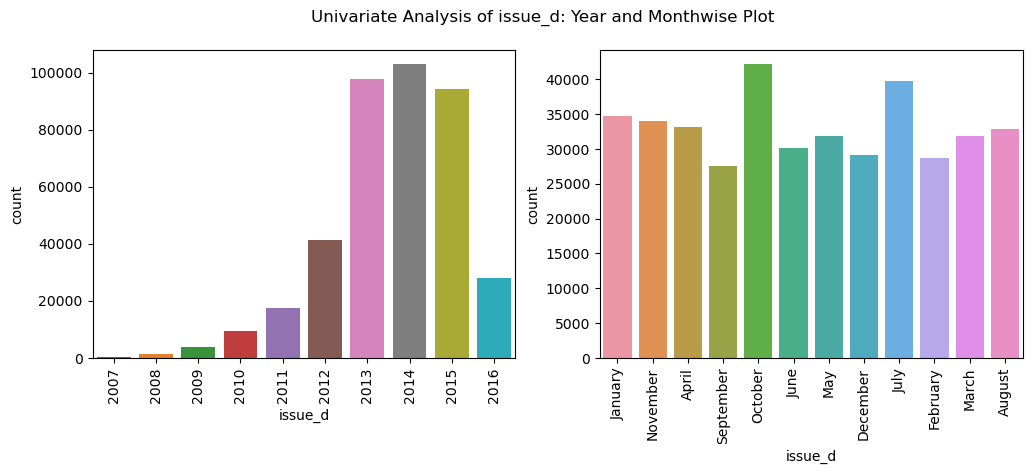

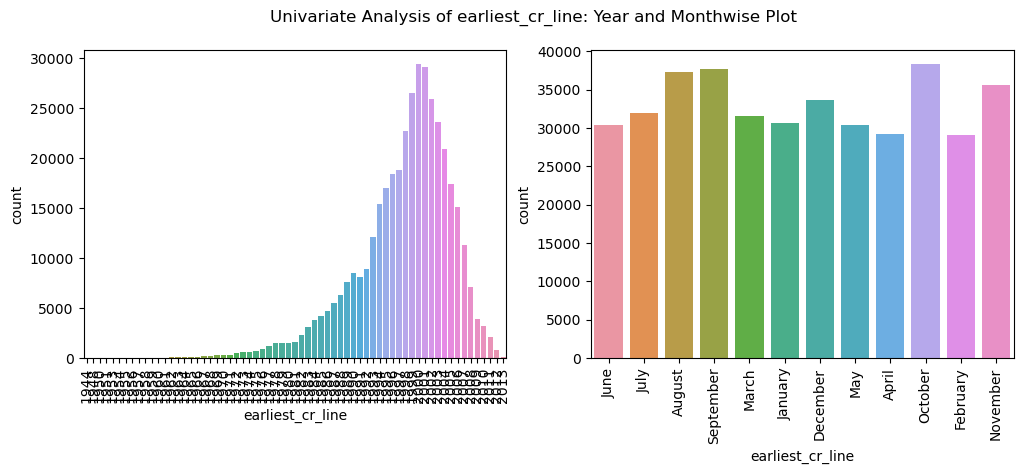

In [83]:
for feature in date_features:
    univariate_plot_date(raw_df, feature)

#### Inference:
- The majority of loans were issued between 2013 and 2015, with October and July emerging as the top two months for loan approvals
- The distribution of the earliest credit line is left-skewed and centered around the year 2000, indicating that most borrowers began their credit journey during this period

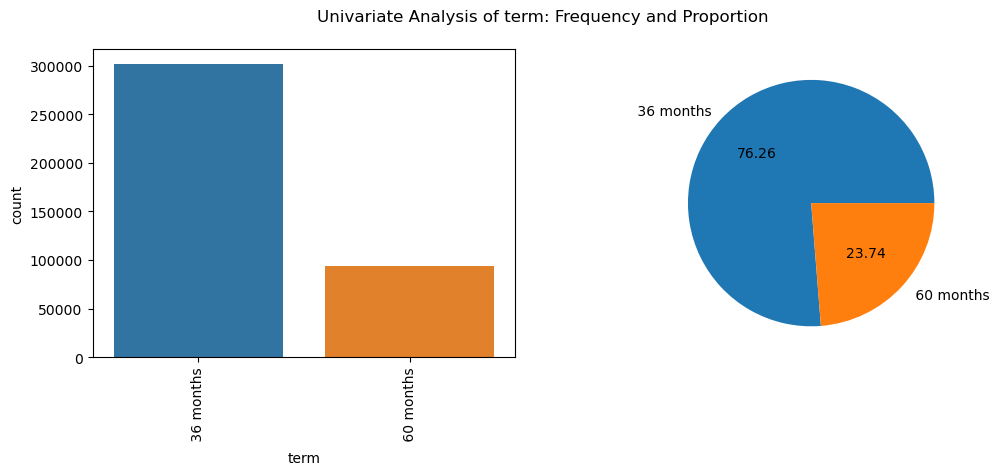

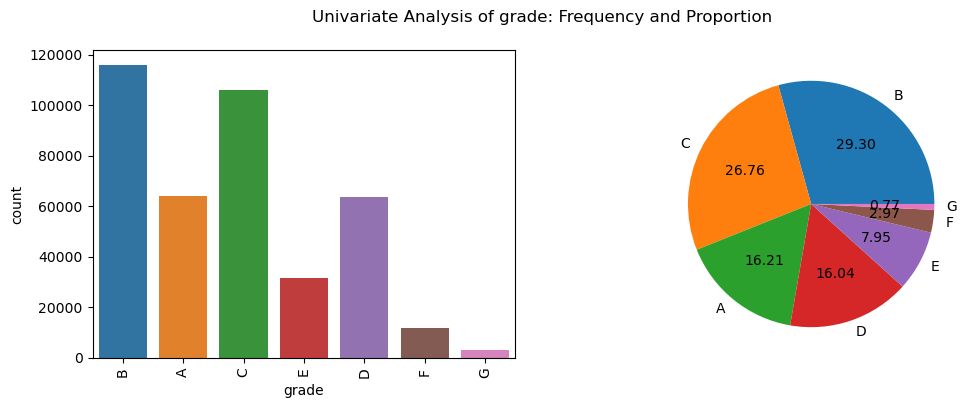

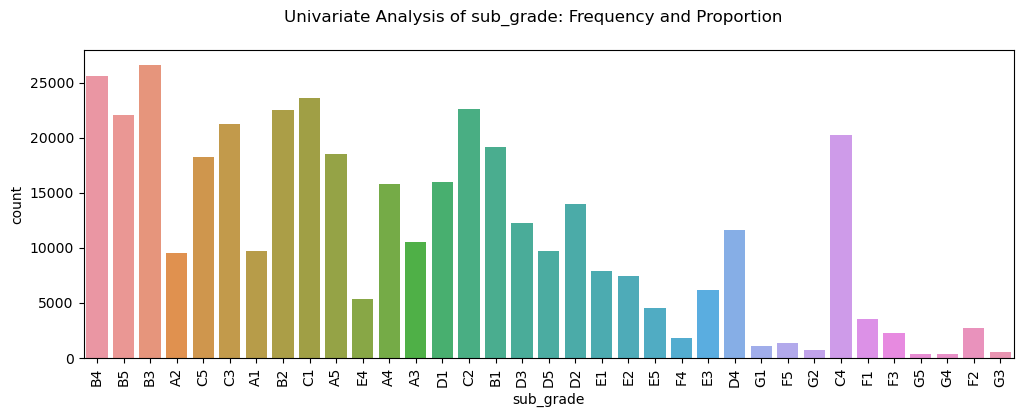

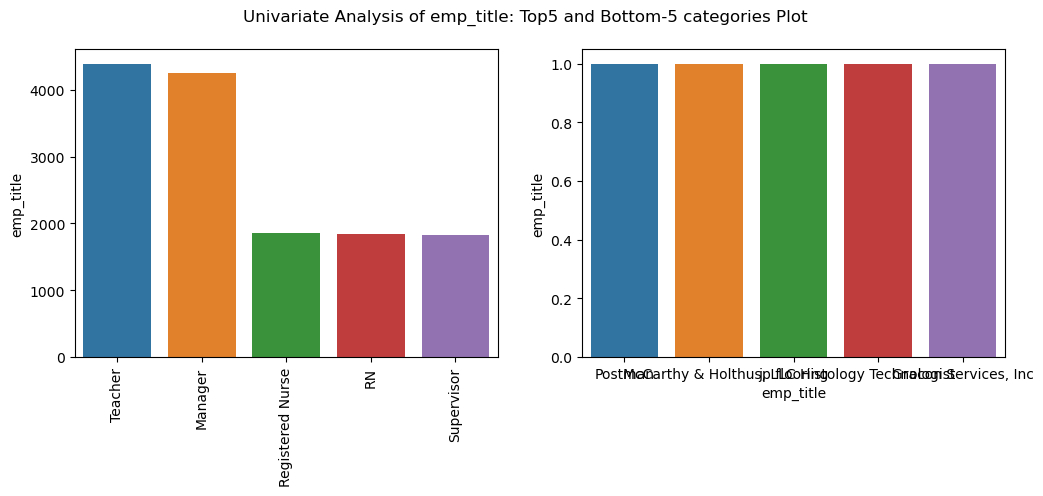

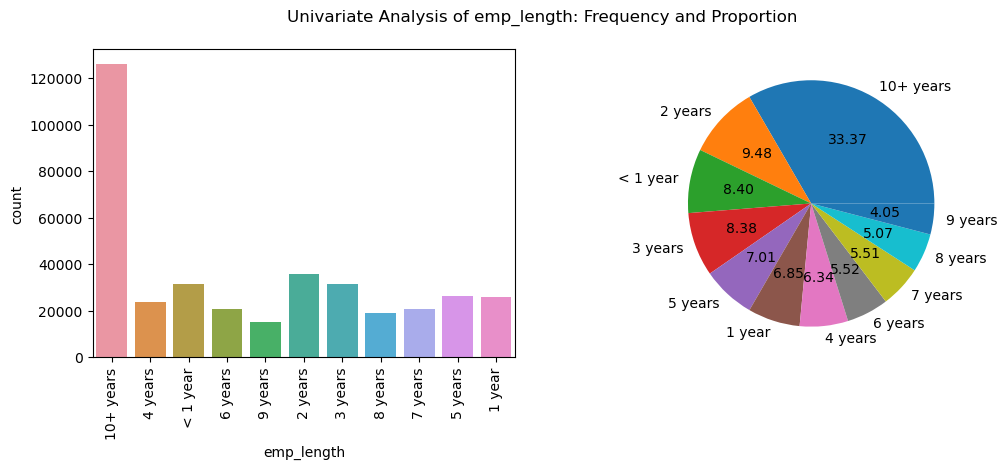

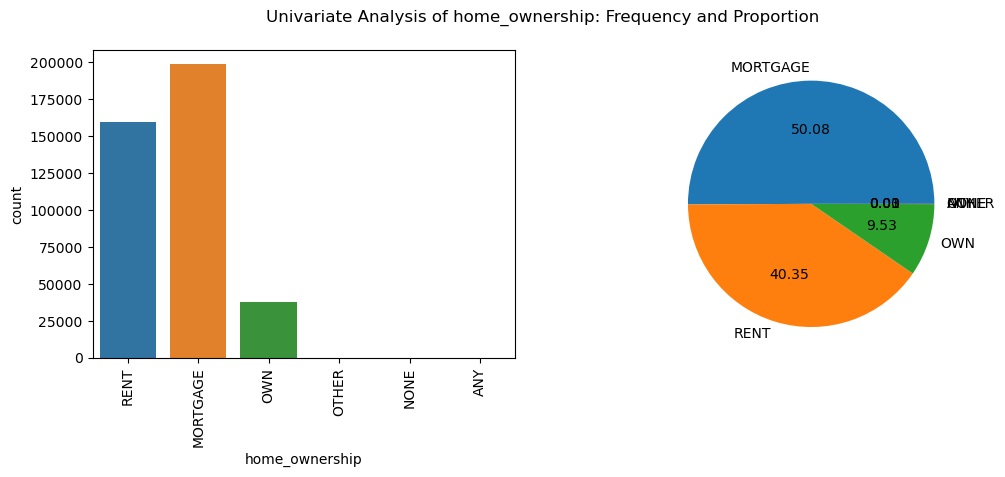

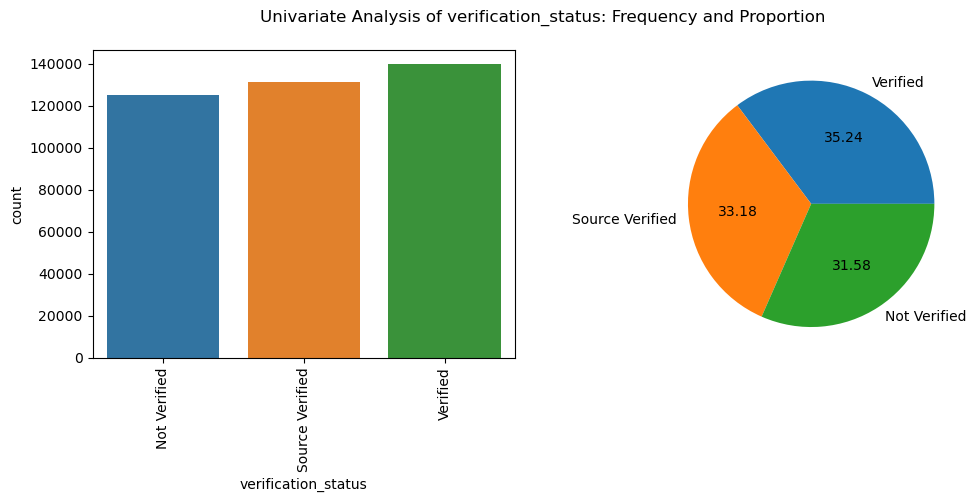

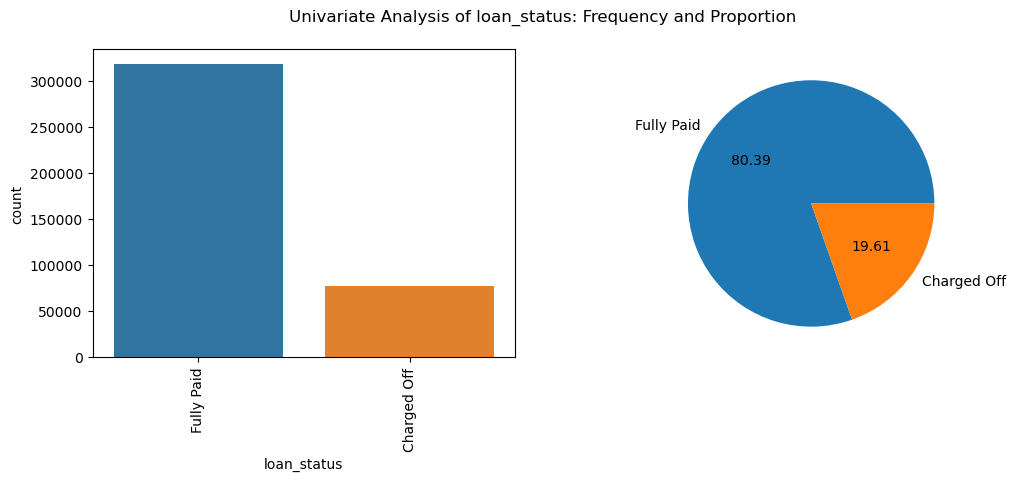

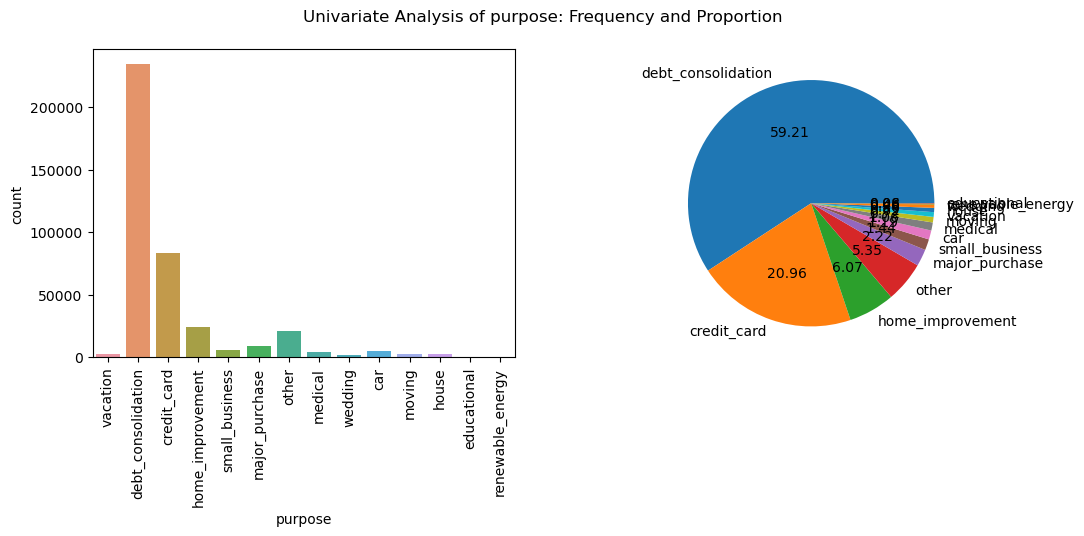

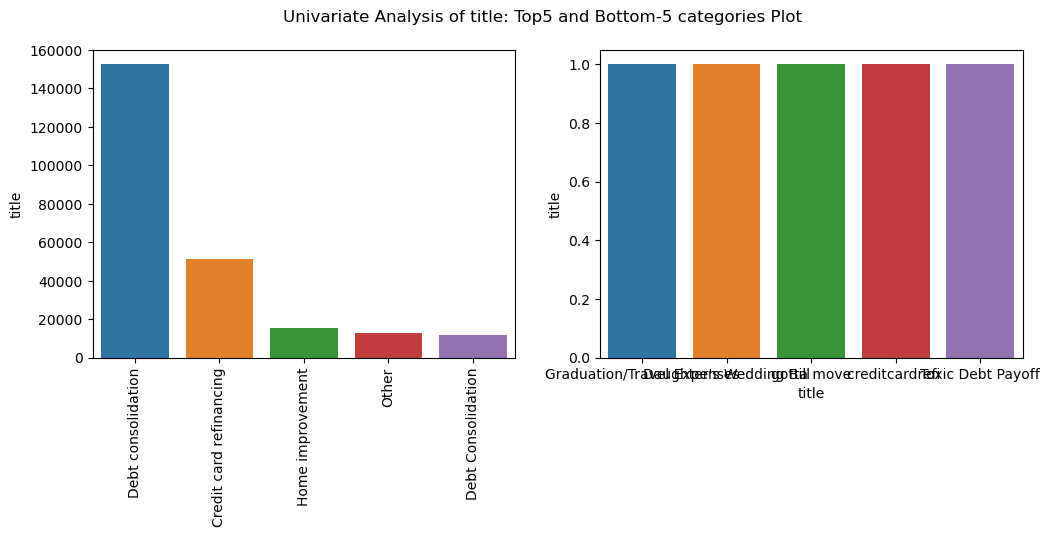

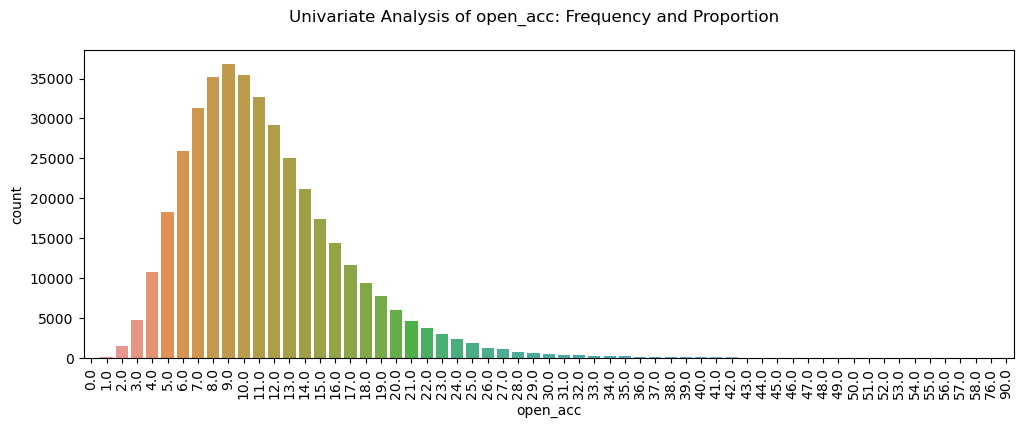

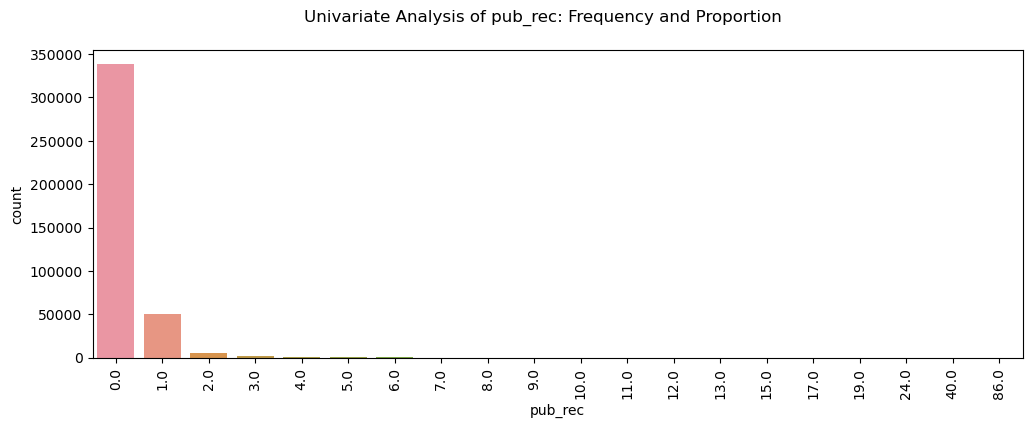

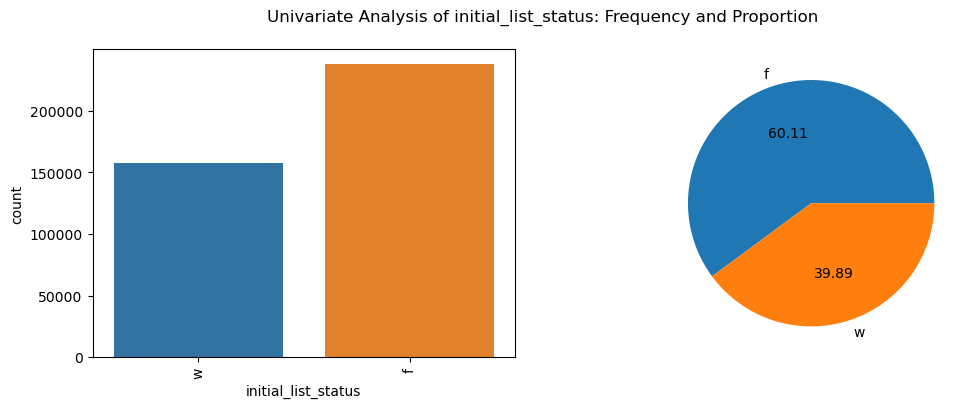

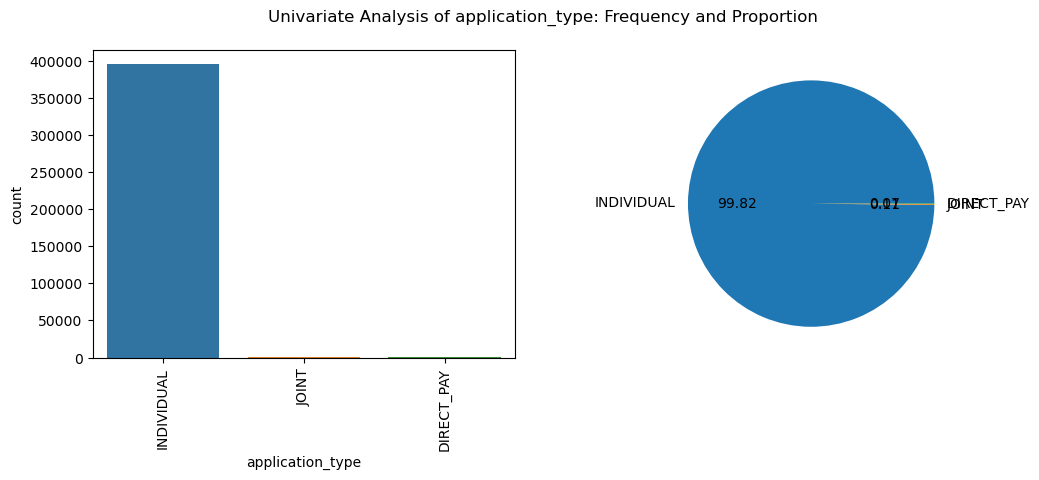

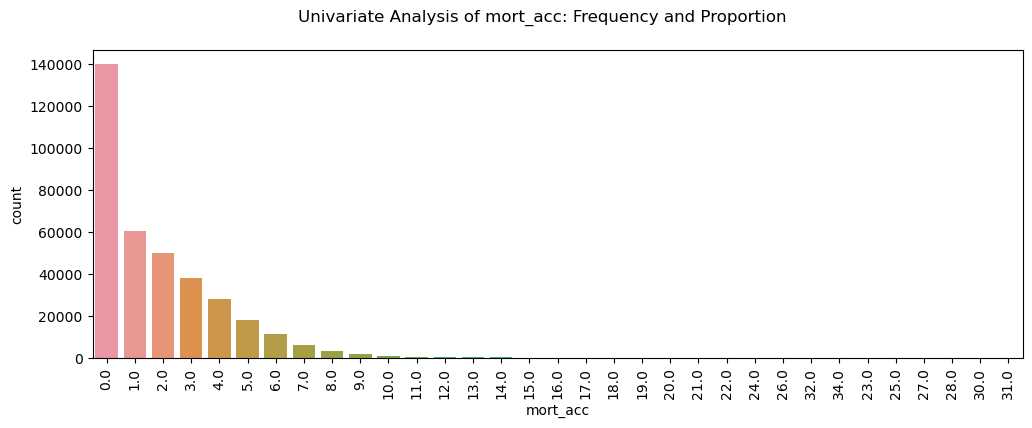

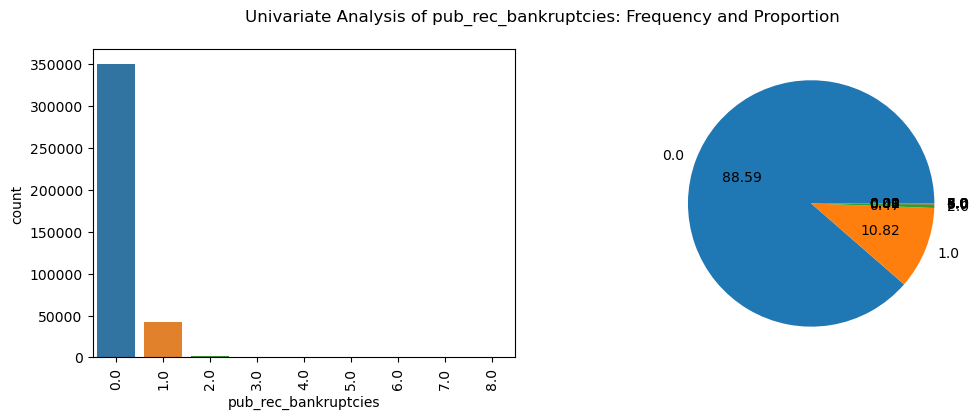

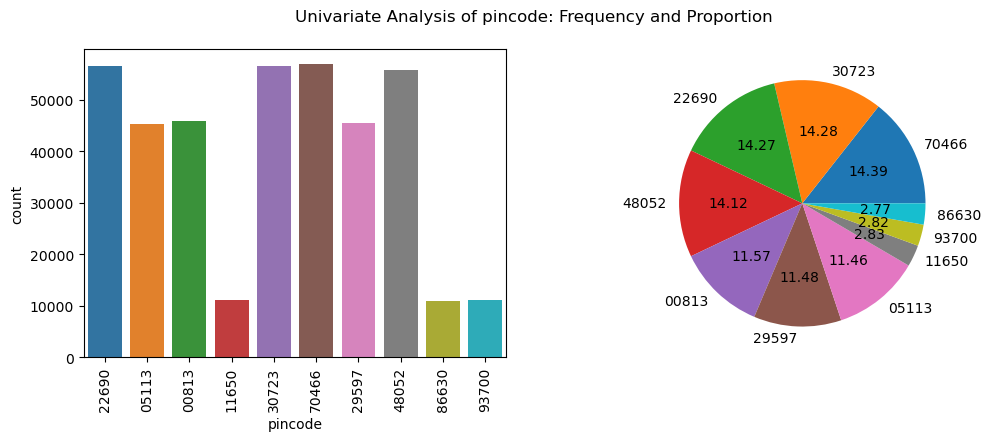

In [137]:
for feature in cat_features:
    univariate_plot_cat(raw_df, feature)

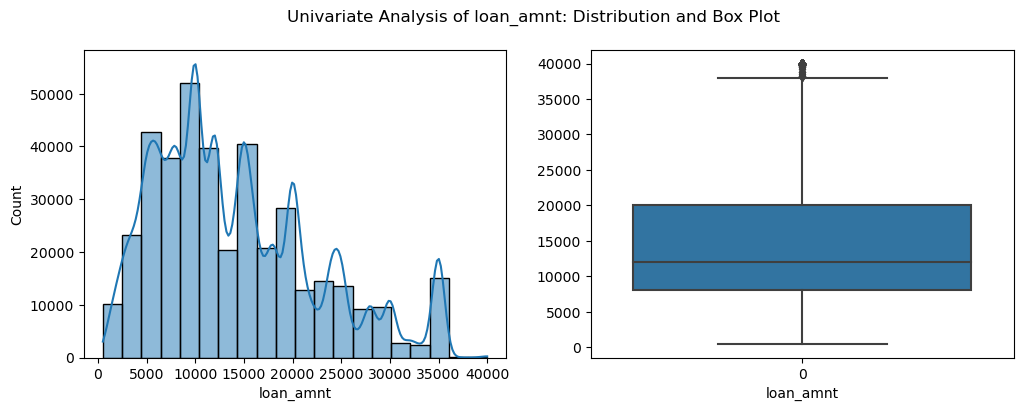

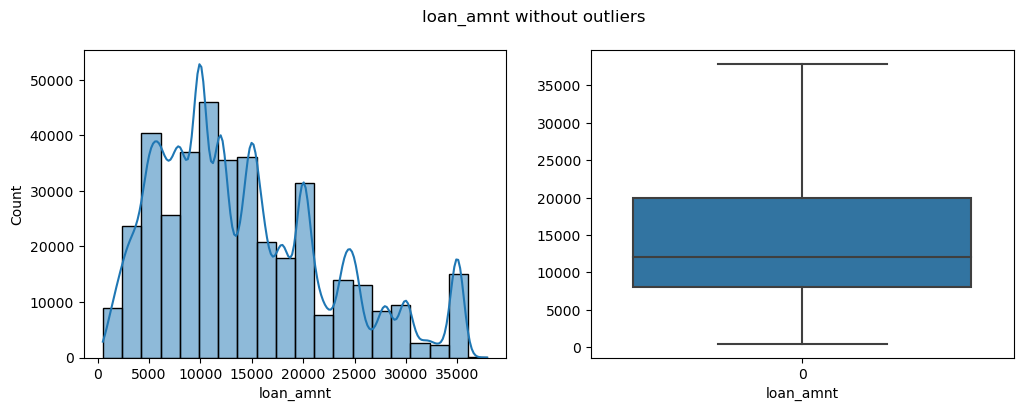

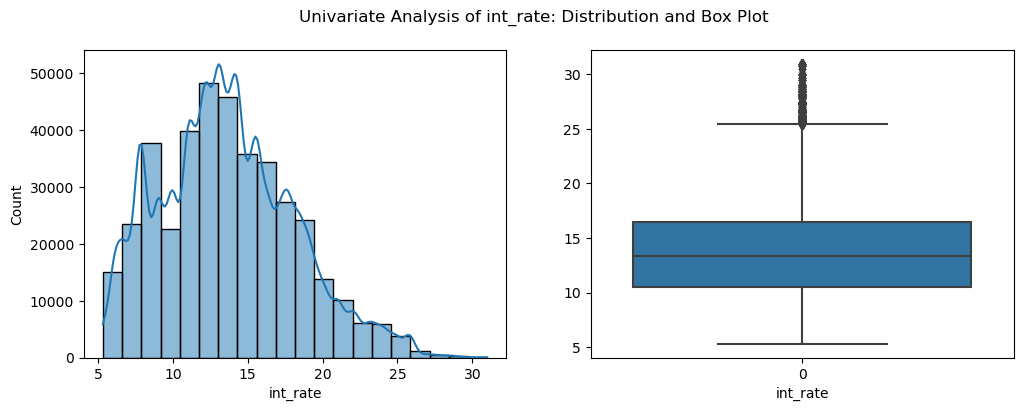

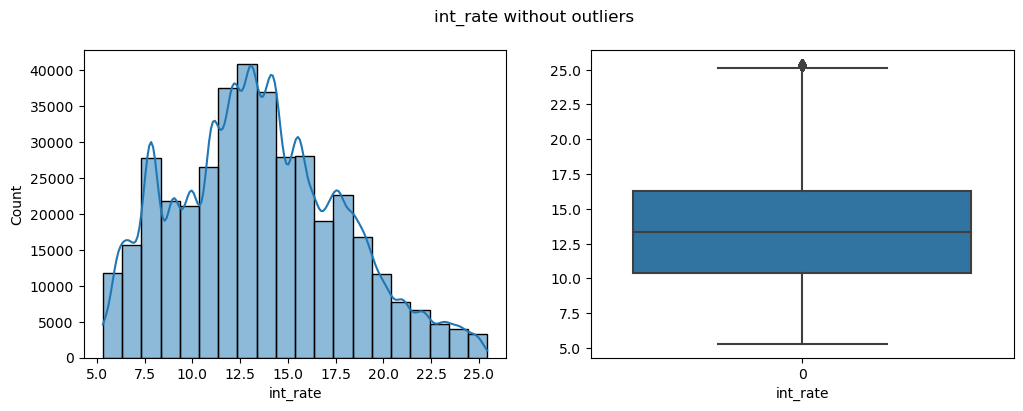

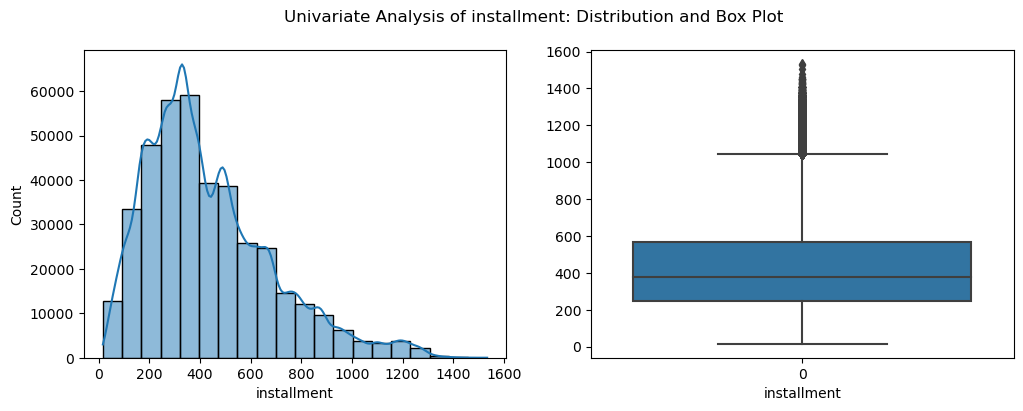

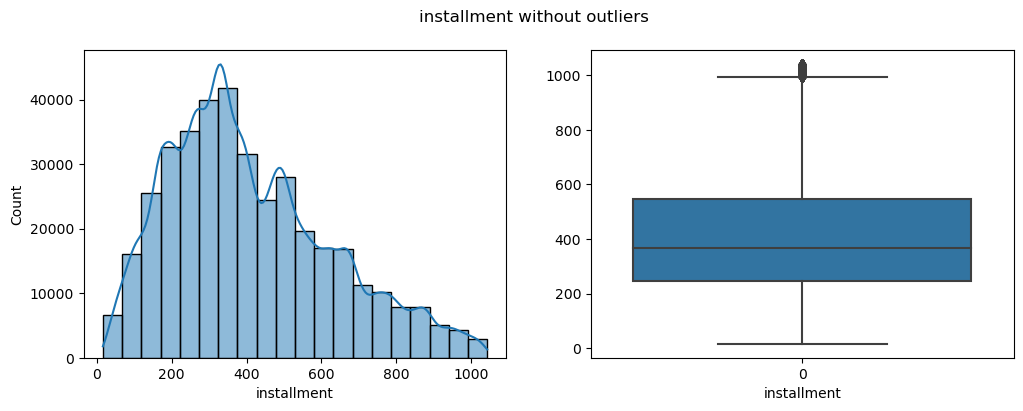

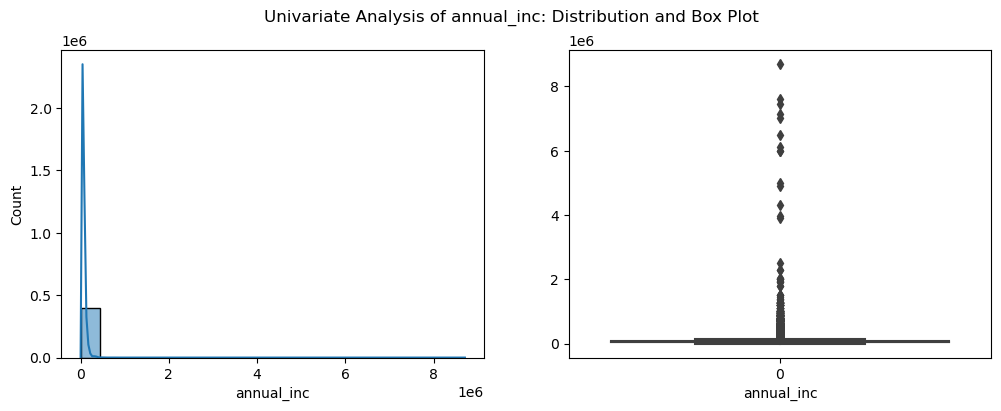

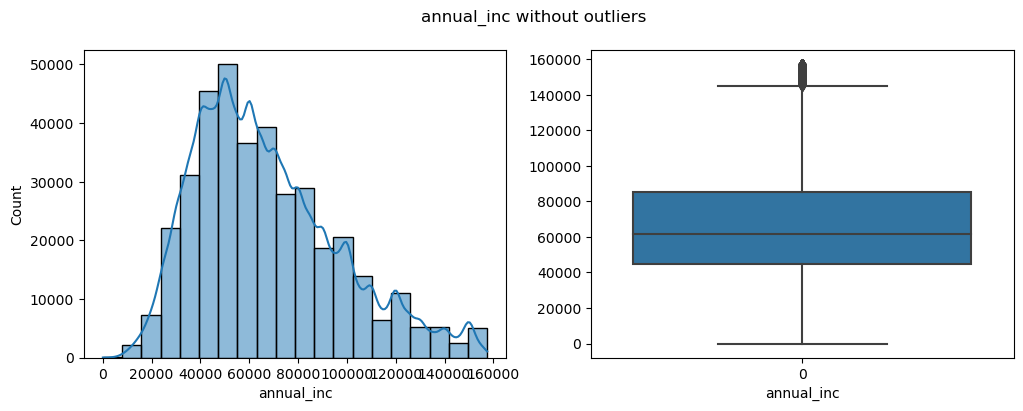

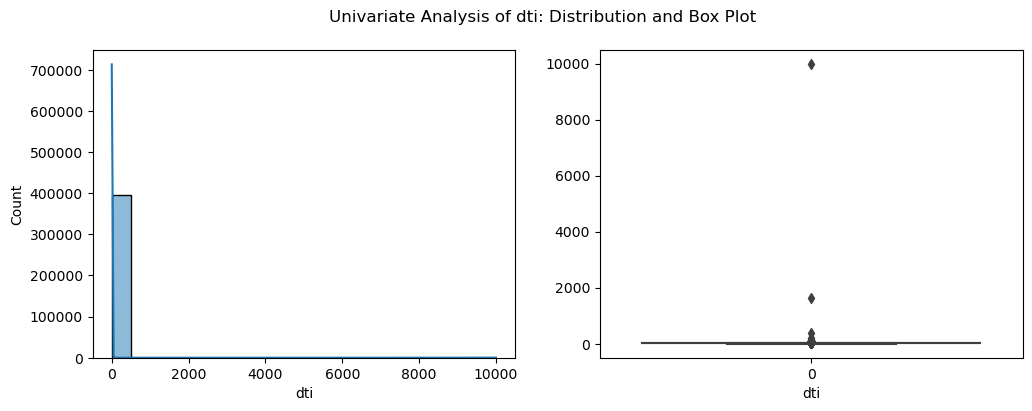

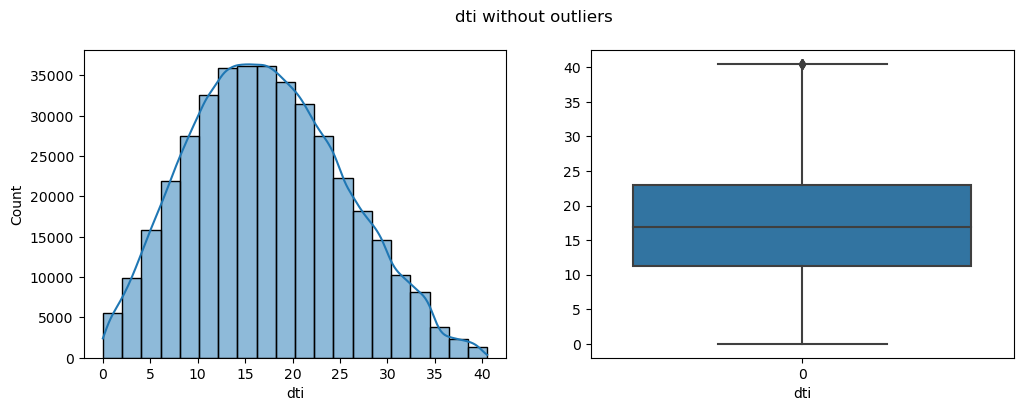

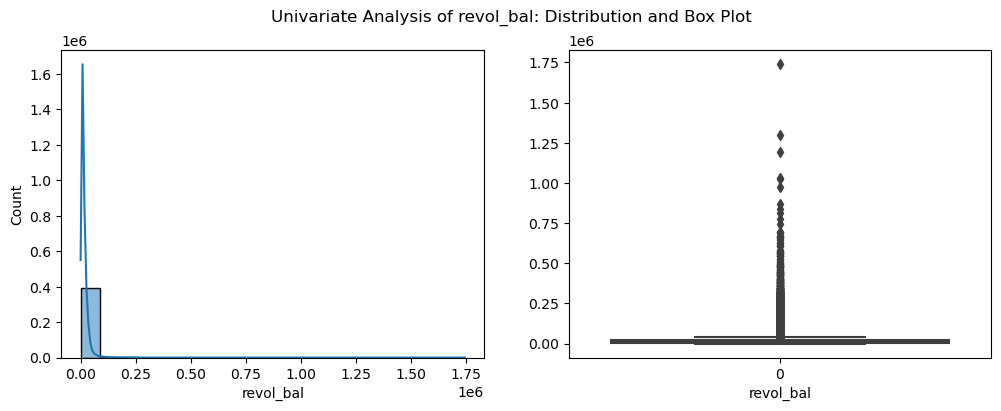

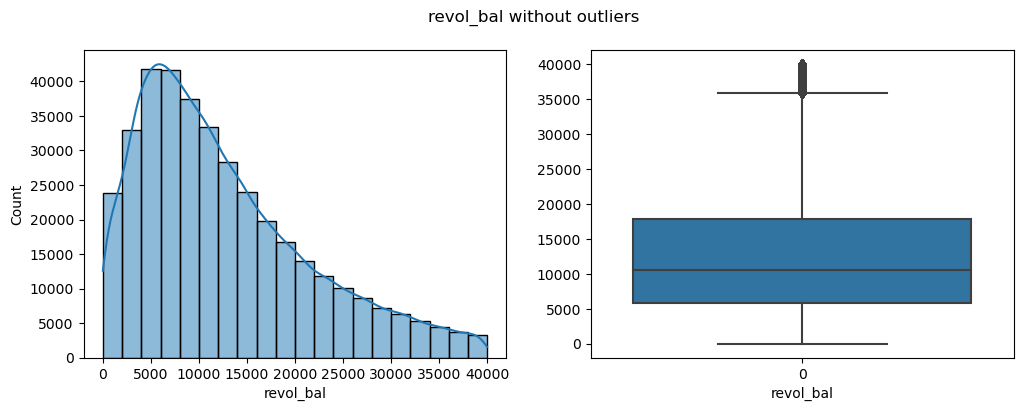

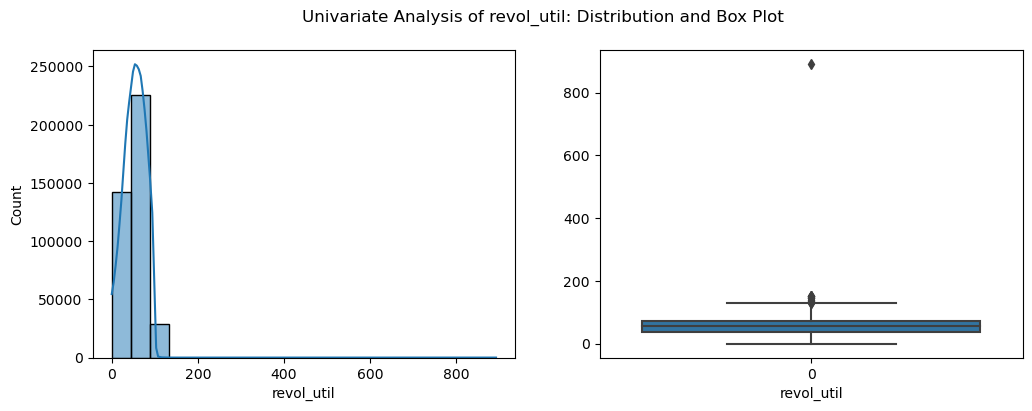

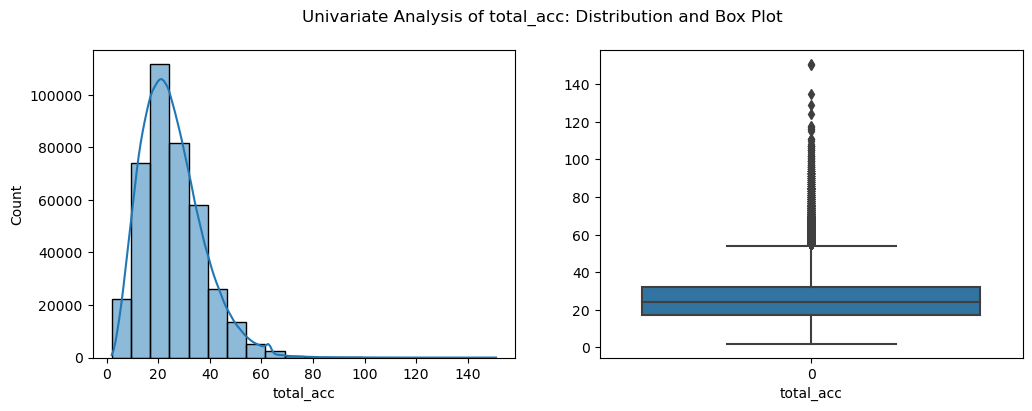

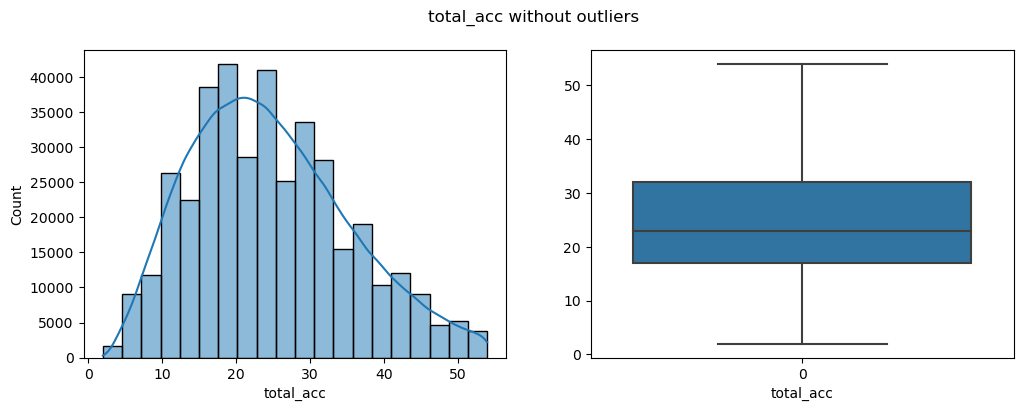

In [138]:
for feature in num_features:    
    univariate_plot_num(raw_df, feature)

### Inference:
- GRE Score, TOEFL Score:
    - Data lies between inter quartile range (IQR), hence outliers doesn't exist
    - Normally distributed and spread out or flat peak
    - No missing range in the data as there are no gaps observed
- CGPA:
    - Data lies between inter quartile range (IQR), hence outliers doesn't exist
    - Normally distributed and sharp peak
    - Gap between 7 and 7.5 indicating the missing range in the data
- University Rating:
    - Ratings in the range 2-4 being 80% of proportion
    - Average rating (3) being the top most
- SOP Strength:
    - Strength in the range 2.5-4.5 being 80% of proportion
    - Average Strength (3.5 and 4.5) being the top most  
    - Lowest strength is neglegible (1.2%)
- LOR Strength:
    - Strength in the range 3-4 being ~60% of proportion
    - Average Strength (3) being the top most
    - Lowest strength is neglegible (0.2%)
- Research:
    - Almost equally distributed

## Categorical Feature Binning

In [166]:
cat_features

['term',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'loan_status',
 'purpose',
 'title',
 'open_acc',
 'pub_rec',
 'initial_list_status',
 'application_type',
 'mort_acc',
 'pub_rec_bankruptcies',
 'pincode']

In [7]:
#grade categories
cat_list = ['E', 'F', 'G']
target = 'E'
raw_df['grade'] = raw_df['grade'].apply(lambda x: target if x in cat_list else x)

In [8]:
#purpose categories
cat_list = ['debt_consolidation', 'credit_card']
target = 'Others'
raw_df['purpose'] = raw_df['purpose'].apply(lambda x: target if x not in cat_list else x)

In [9]:
#pincode categories
cat_list = ['86630', '93700', '11650']
target = 'Others'
raw_df['pincode'] = raw_df['pincode'].apply(lambda x: target if x in cat_list else x)

In [10]:
#home_ownership categories
cat_list = ['OTHER', 'NONE', 'ANY']
target = 'OTHER'
raw_df['home_ownership'] = raw_df['home_ownership'].apply(lambda x: target if x in cat_list else x)

In [11]:
#sub_grade categories
cat_list = [['E'+str(i), 'F'+str(i), 'G'+str(i)] for i in range(1, 6)]
target_list = ['E'+str(i) for i in range(1, 6)]
for i in range(len(target_list)):
    raw_df['sub_grade'] = raw_df['sub_grade'].apply(lambda x: target_list[i] if x in cat_list[i] else x)

In [12]:
#emp_length categories
target_list = ["0 to 2", "3 to 5", "6 to 9"]
cat_list = [["<1 year", "1 year", "2 years"], ["3 years", "4 years", "5 years"], ["6 years", "7 years", "8 years", "9 years"]]
for i in range(len(target_list)):
    raw_df['emp_length'] = raw_df['emp_length'].apply(lambda x: target_list[i] if x in cat_list[i] else x)

In [13]:
#pub_rec_bankruptcies categories
target = 1
raw_df['pub_rec_bankruptcies'] = raw_df['pub_rec_bankruptcies'].apply(lambda x: target if x > 0 else x)

In [14]:
#mort_acc categories
cat_list = [1, 3, 8, raw_df['mort_acc'].max()+1]
target = [1, 2, 3]
for i in range(len(cat_list)-1):
    raw_df['mort_acc'] = raw_df['mort_acc'].apply(lambda x: target[i] if x >= cat_list[i] and x < cat_list[i+1] else x)

In [15]:
#pub_rec categories
target = 2
raw_df['pub_rec'] = raw_df['pub_rec'].apply(lambda x: target if x >= 2 else x)

In [16]:
#open_acc categories
cat_list = [0, 5, 10, 15, 20, 25, raw_df['open_acc'].max()+1]
target = np.arange(6)
for i in range(len(cat_list)-1):
    raw_df['open_acc'] = raw_df['open_acc'].apply(lambda x: target[i] if x >= cat_list[i] and x < cat_list[i+1] else x)

## Outlier Analysis

In [105]:
feature = 'loan_amnt'
q1 = np.percentile(raw_df[feature], 25)
q3 = np.percentile(raw_df[feature], 75)
iqr = q3 - q1
print(feature, ":", len(raw_df[raw_df[feature]> (q3 + 1.5*iqr)]))

loan_amnt : 191


In [107]:
q3 + 1.5*iqr

38000.0

In [97]:
len(raw_df)

396030

In [73]:
skew_list = []
kurt_list = []
for feature in num_features:
    skew_list.append(np.round(skew(raw_df[feature]),2))
    kurt_list.append(np.round(kurtosis(raw_df[feature]),2))
pd.DataFrame(data=[skew_list, kurt_list], index = ['Skew', 'Kurtosis'], columns=num_features)

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

## Bivariate Analysis
- Categorical Vs Categorical Feature
- Numerical Vs Numerical Feature
- Categorical Vs Numerical Feature

## Multivariate Analysis

C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


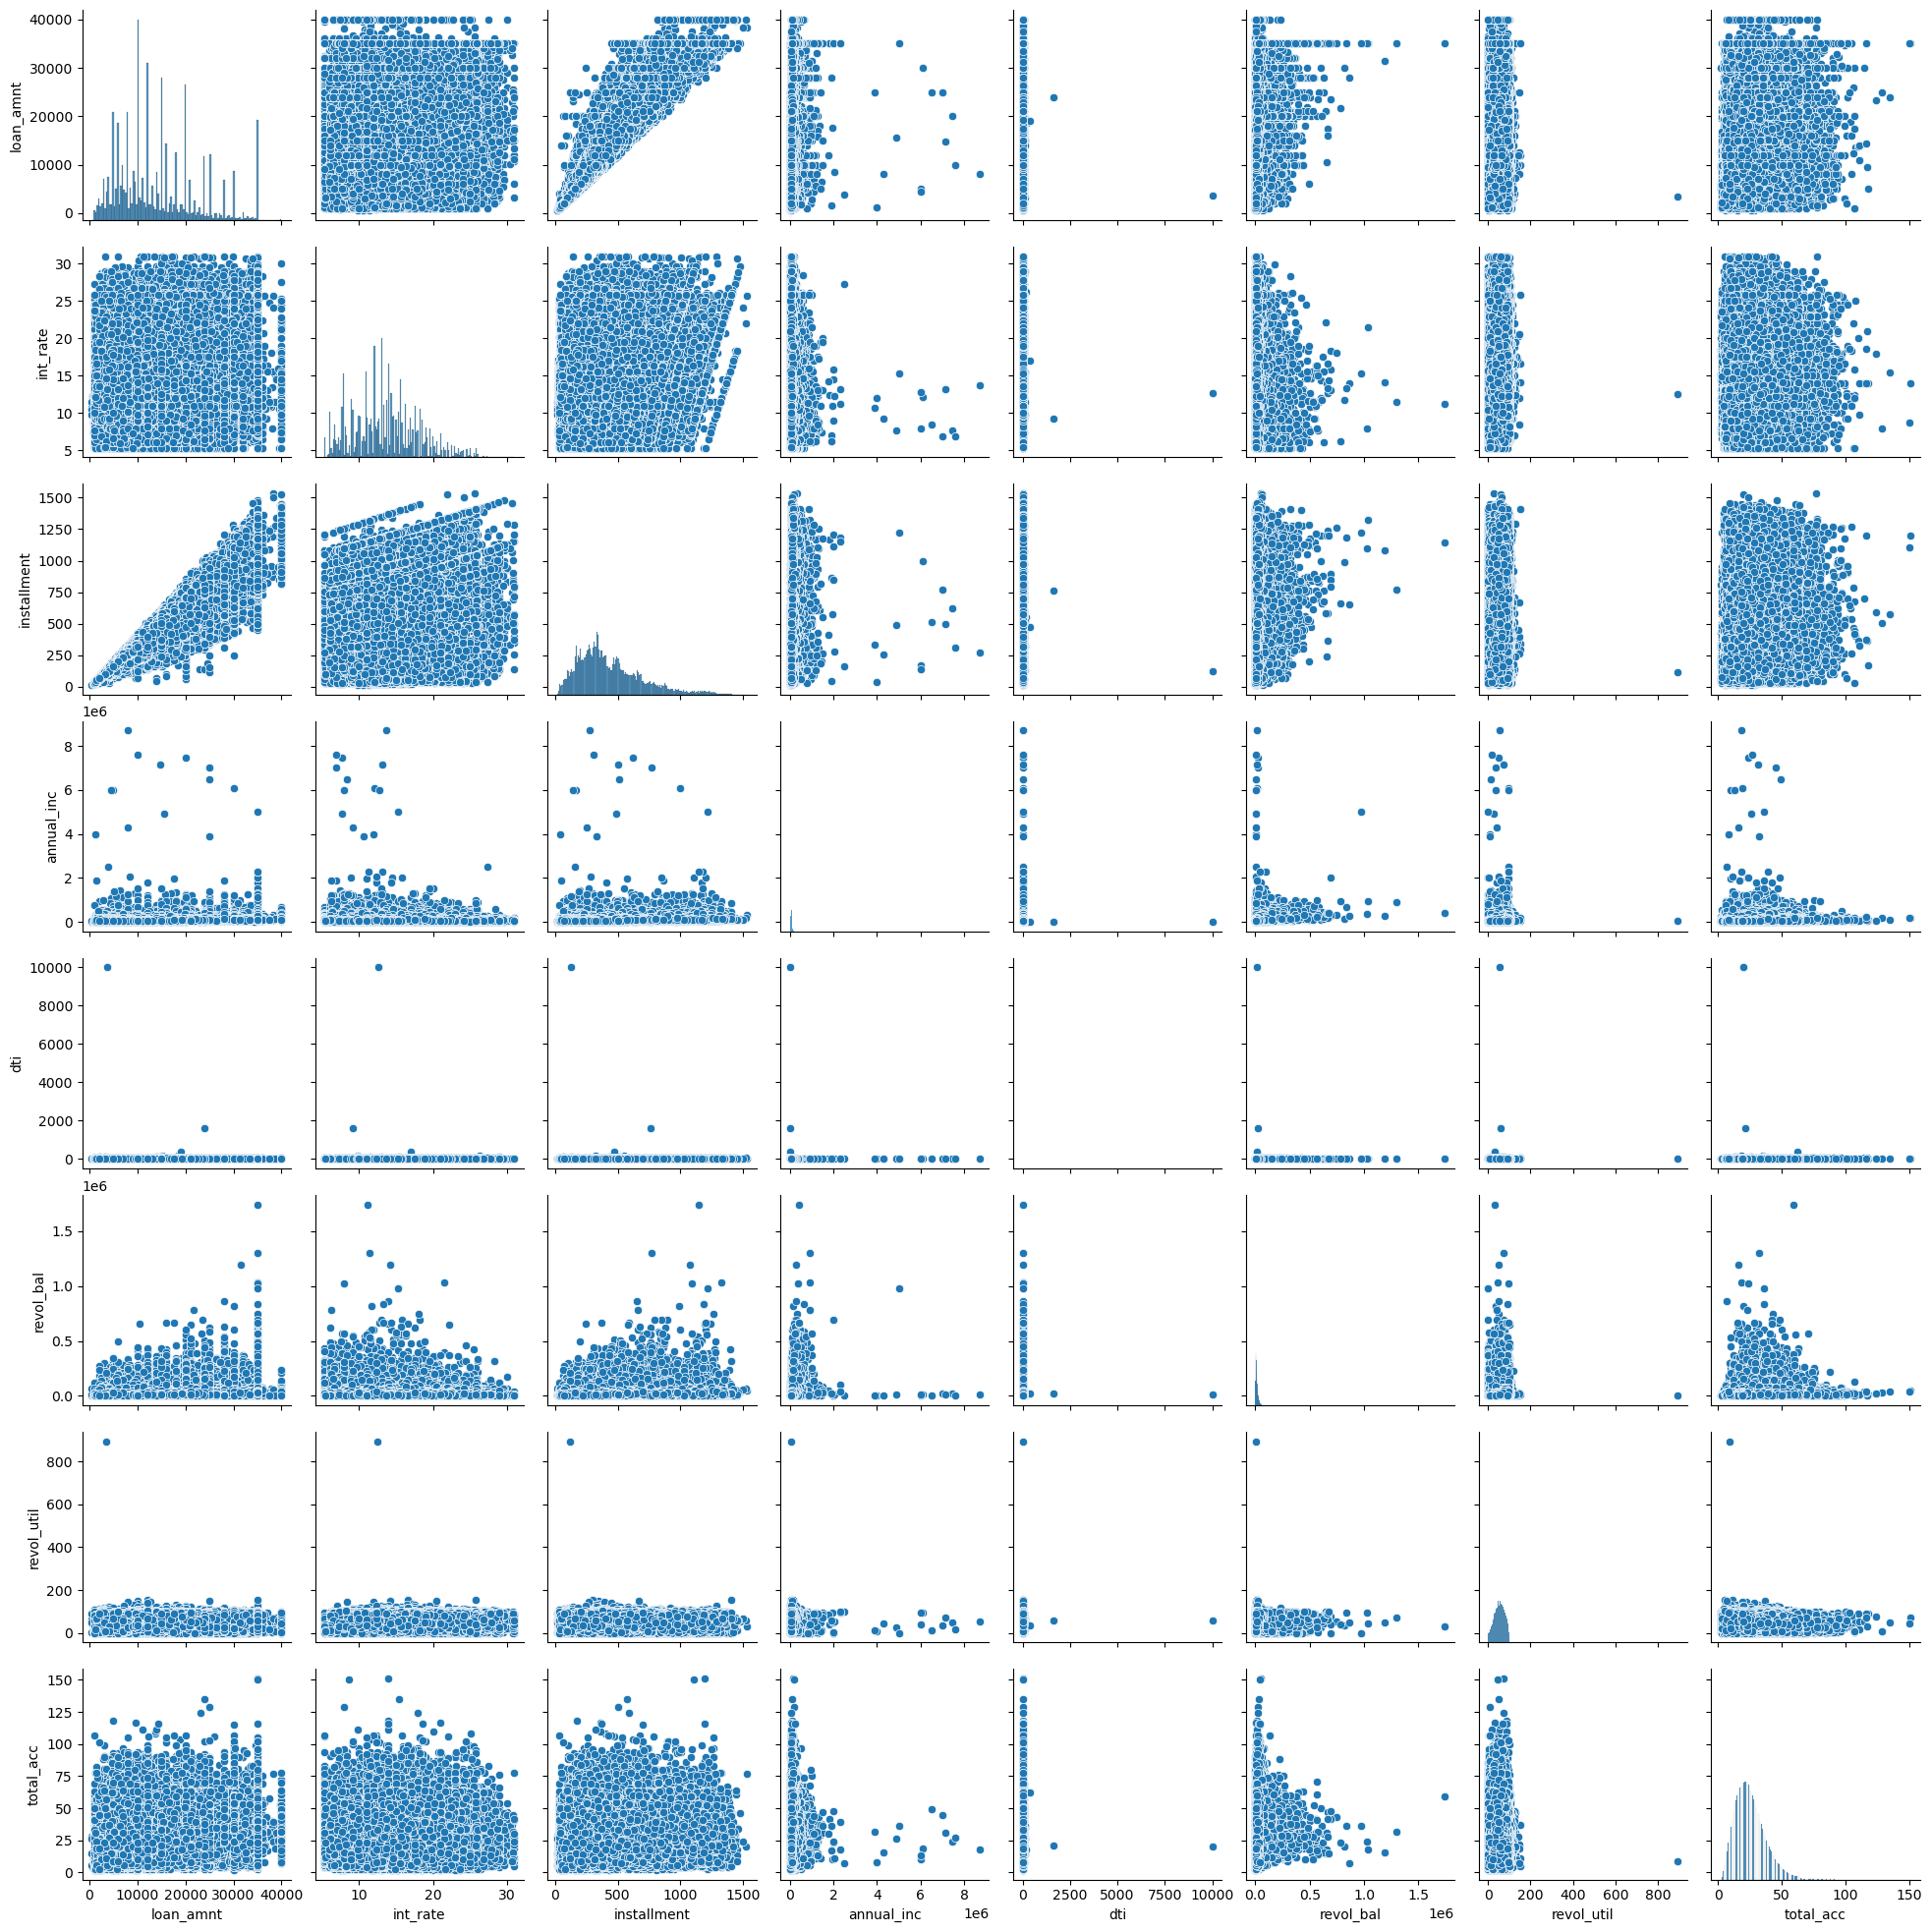

In [70]:
sns.pairplot(raw_df[num_features])

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11164\383084018.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(raw_df.corr(), annot=True)


<Axes: >

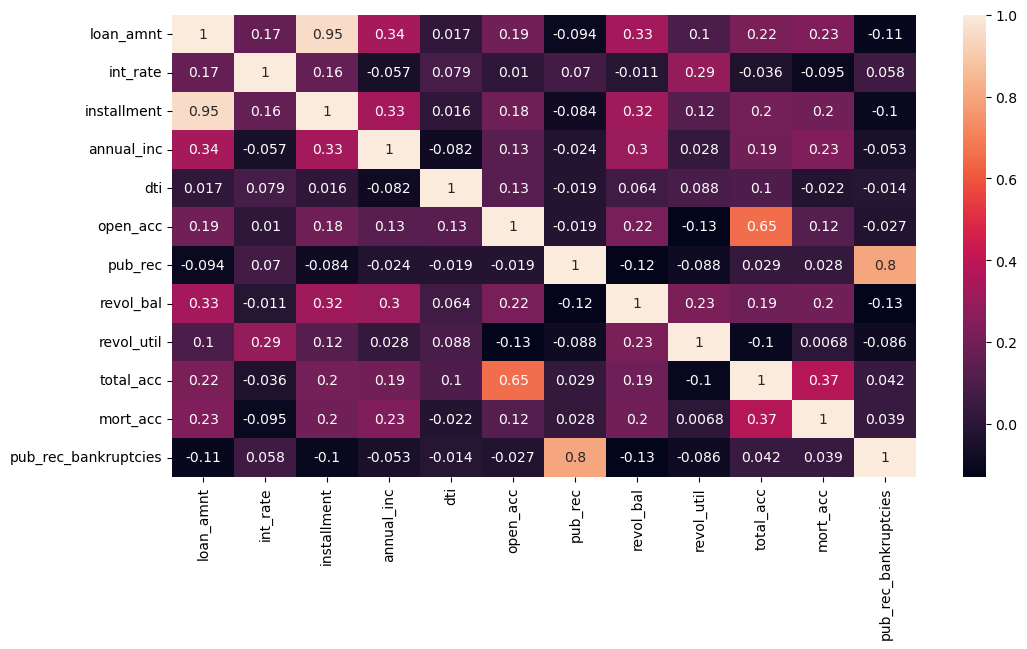

In [68]:
plt.figure(figsize=(12,6))
sns.heatmap(raw_df.corr(), annot=True)

#### Inference:
- Following features are highly correlated
    - loan amount and installment
    - open acc and total acc
    - pub rec and pub rec bankruptcies
- Other features doesn't have any significant correlation

## Target Variable Analysis
- BVA with each numerical and categorical features
- Target correlation with Features

### Loan Status vs Numerical Features

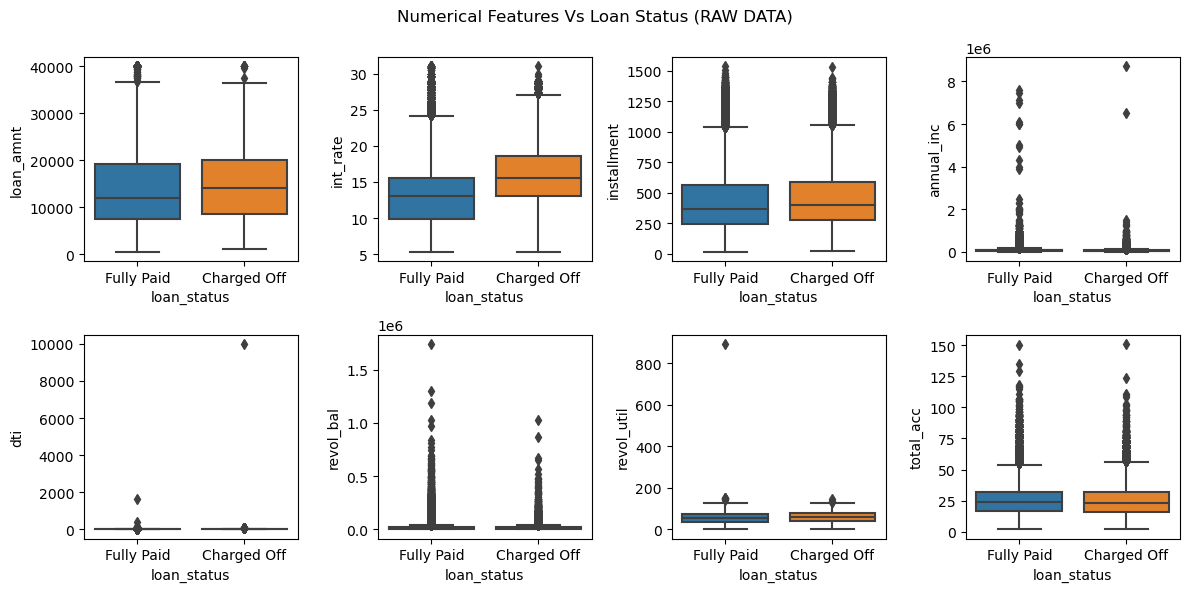

In [59]:
plt.figure(figsize=(12, 6))
plt.suptitle('Numerical Features Vs Loan Status (RAW DATA)')
for i in range(len(num_features)):
    plt.subplot(2,4,i+1)
    sns.boxplot(y=raw_df[num_features[i]], x = raw_df['loan_status'])
plt.tight_layout()

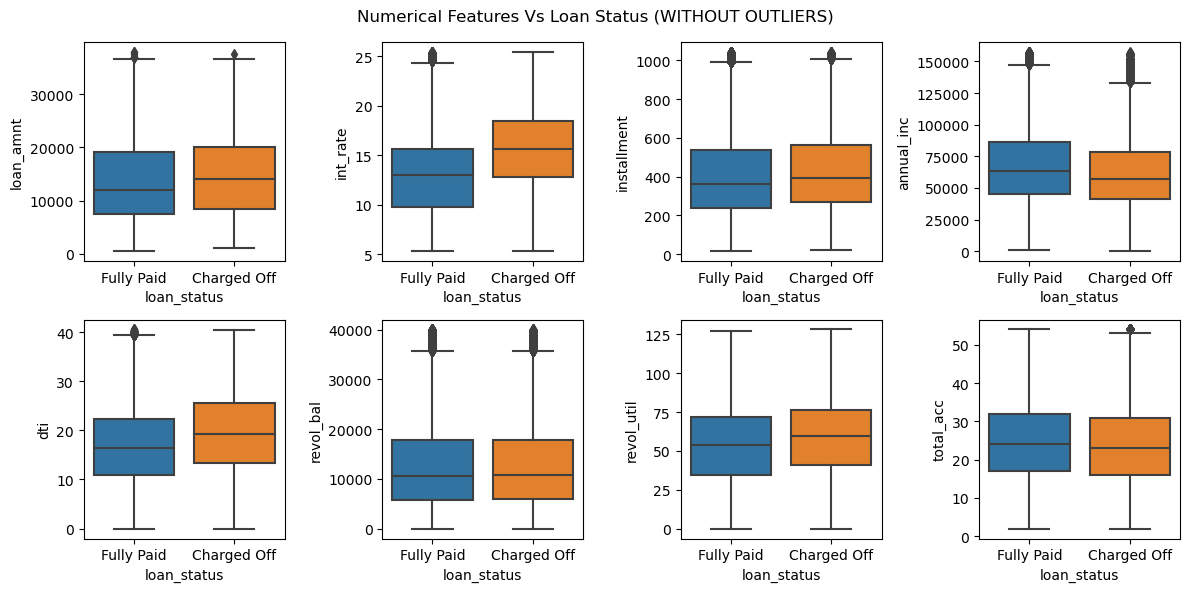

In [163]:
plt.figure(figsize=(12, 6))
plt.suptitle('Numerical Features Vs Loan Status (WITHOUT OUTLIERS)')
for i in range(len(num_features)):
    plt.subplot(2,4,i+1)
    iqr = outlier_detection(raw_df, num_features[i])    
    sns.boxplot(y=raw_df[raw_df[num_features[i]]<iqr[1]][num_features[i]], x = raw_df['loan_status'])
plt.tight_layout()

#### Inference:
- Outliers in the data make it challenging to draw meaningful inferences.
- A clear distinction is observed in the distribution of interest rate and DTI (debt-to-income ratio) between loyal customers and defaulters.
- Other features show no significant difference in their distribution relative to the target variable, though this needs to be validated through statistical tests.

### Loan Status vs Categorical Features

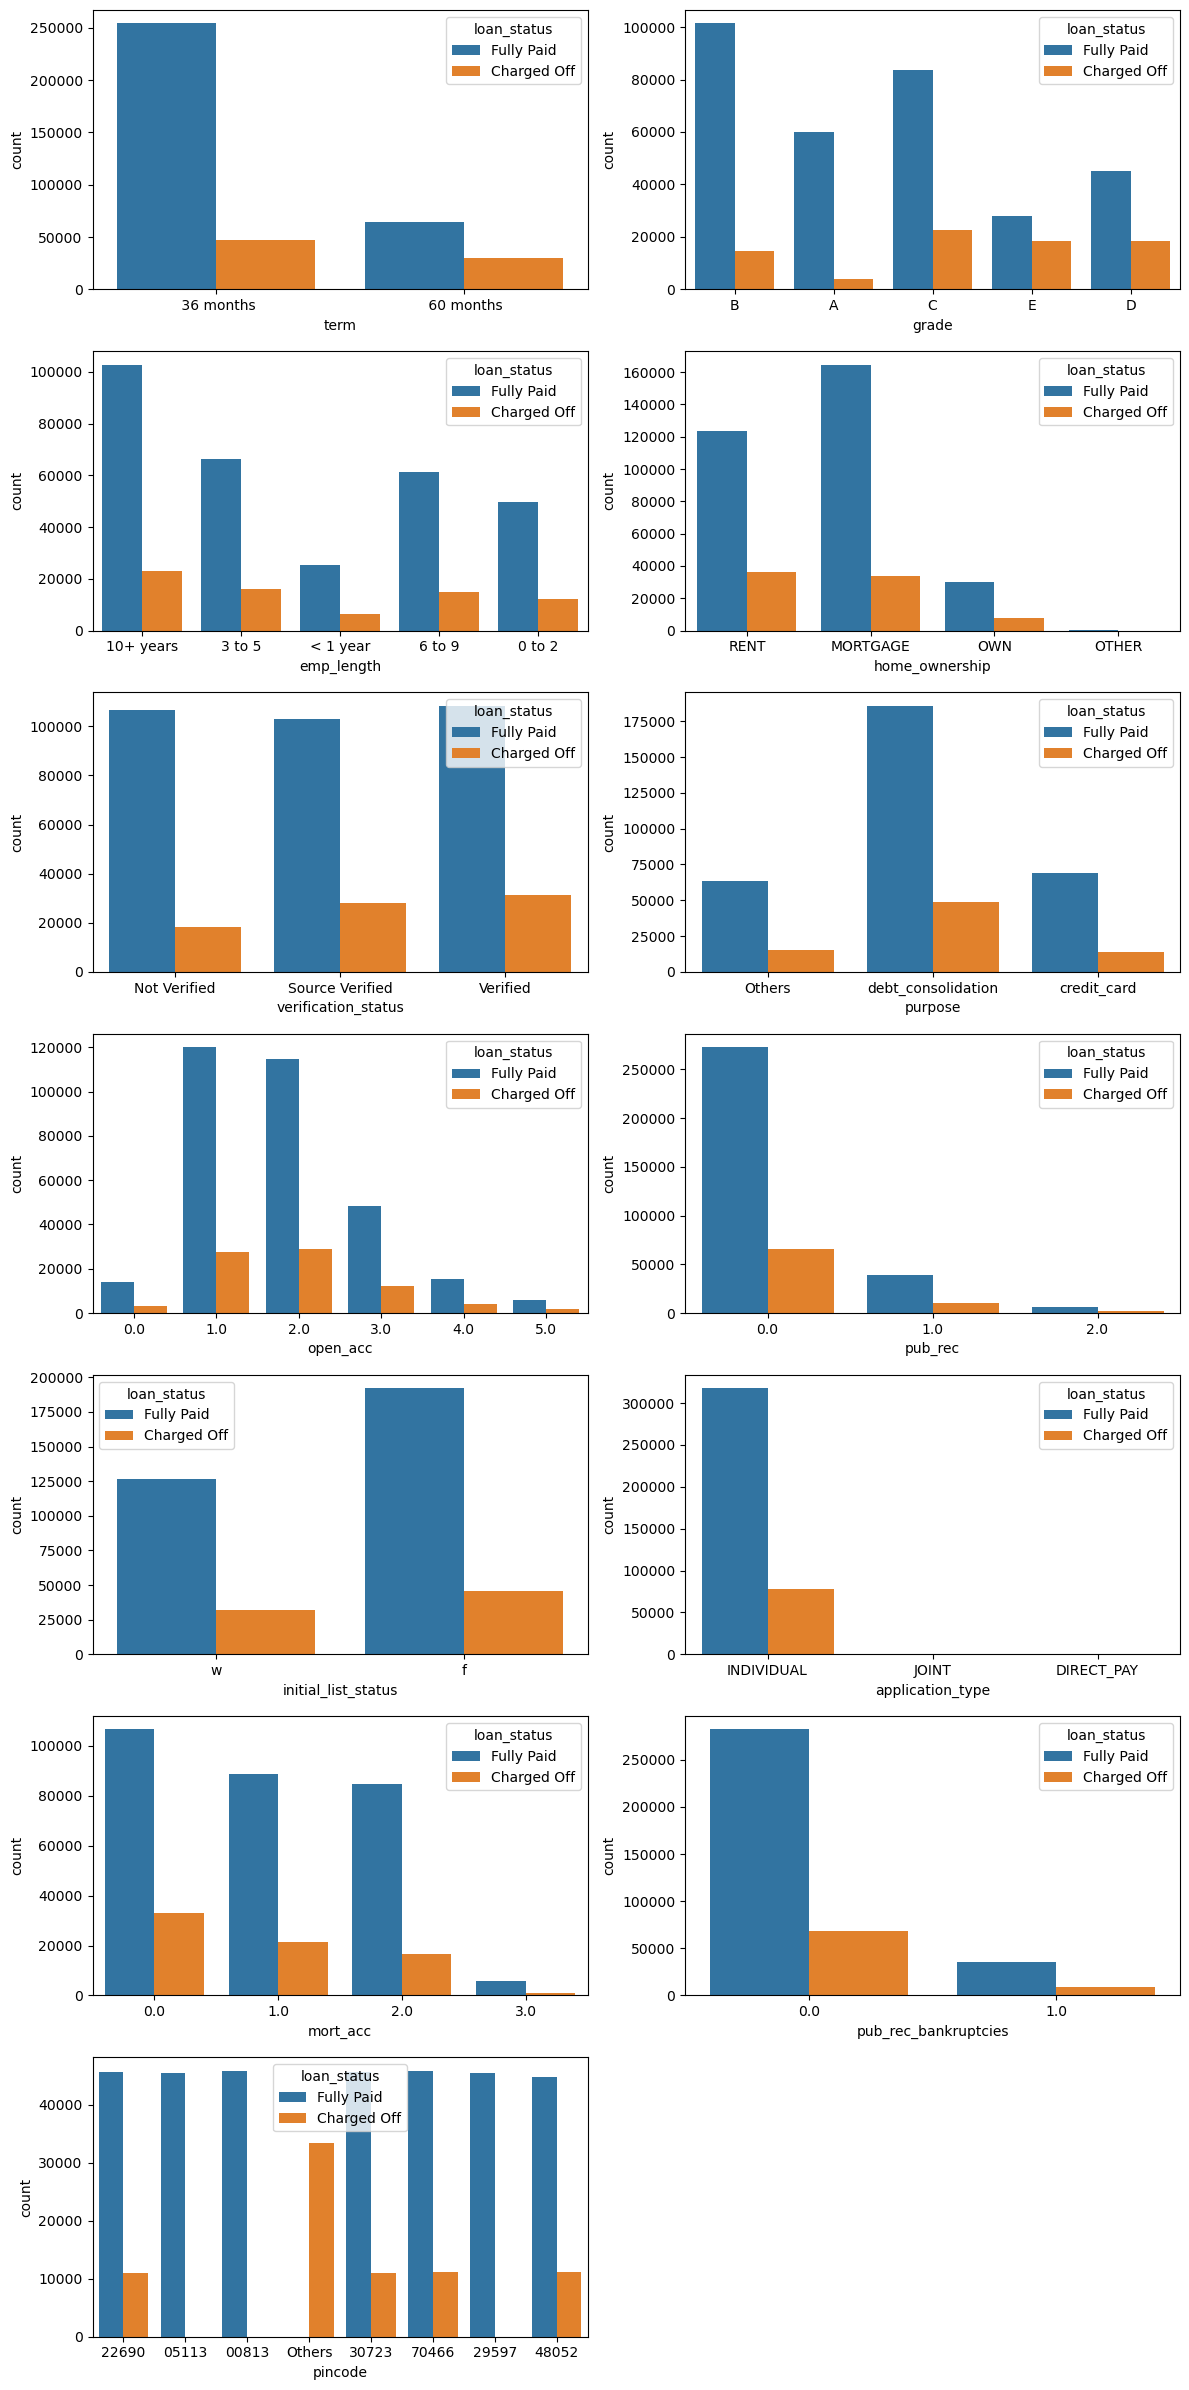

In [56]:
plt.figure(figsize=(12, 24))
skip_features = ['sub_grade', 'emp_title', 'title']
plt_cnt = 1
for feature in cat_features:
    if feature == 'loan_status' or feature in skip_features:
        continue
    plt.subplot(7,2,plt_cnt)
    sns.countplot(data = raw_df, x = feature, hue='loan_status')
    plt_cnt += 1
    #plt.ylim(0.4, 1)
plt.tight_layout()

<Axes: xlabel='issue_mon', ylabel='count'>

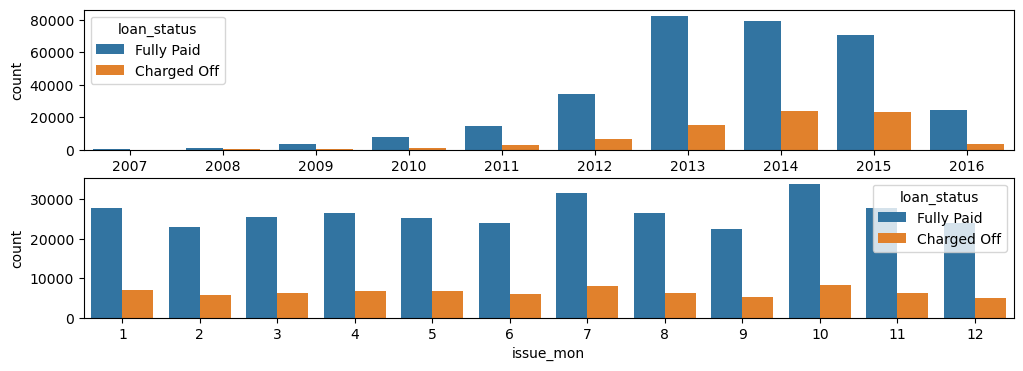

In [159]:
plt.figure(figsize=(12,4))
raw_df ['issue_yr'] = raw_df['issue_d'].dt.year
raw_df ['issue_mon'] = raw_df['issue_d'].dt.month
plt.subplot(2,1,1)
sns.countplot(data = raw_df, x = 'issue_yr', hue='loan_status')
plt.subplot(2,1,2)
sns.countplot(data = raw_df, x = 'issue_mon', hue='loan_status')

Text(0.5, 1.0, 'Churn Ratio over years')

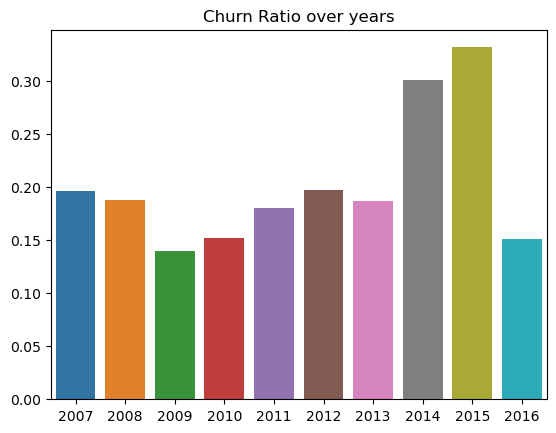

In [173]:
test = raw_df.groupby(['issue_yr', 'loan_status'])['loan_amnt'].count()
sns.barplot(x = raw_df['issue_yr'].unique(), y=[test.loc[year][0]/test.loc[year][1] for year in raw_df['issue_yr'].unique()])
plt.title('Churn Ratio over years')

Text(0.5, 1.0, 'Churn Ratio over Months')

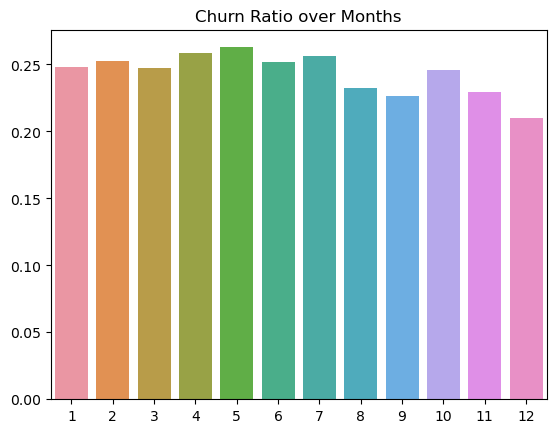

In [174]:
test = raw_df.groupby(['issue_mon', 'loan_status'])['loan_amnt'].count()
sns.barplot(x = raw_df['issue_mon'].unique(), y=[test.loc[mon][0]/test.loc[mon][1] for mon in raw_df['issue_mon'].unique()])
plt.title('Churn Ratio over Months')

<Axes: xlabel='sub_grade', ylabel='count'>

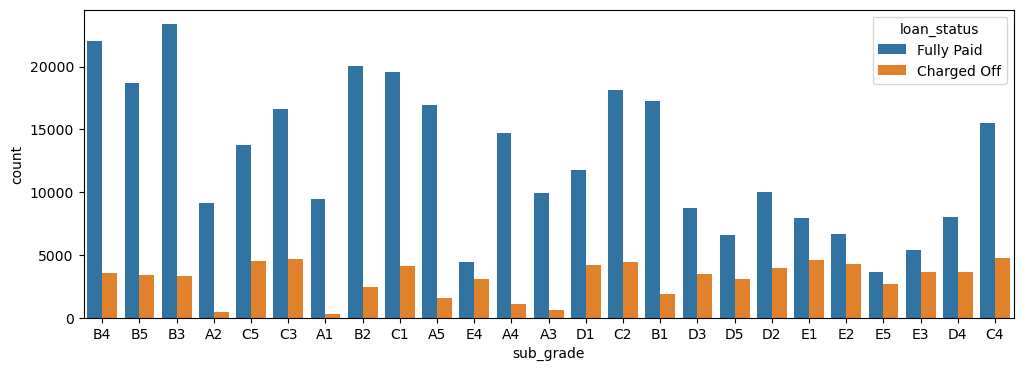

In [58]:
plt.figure(figsize=(12,4))
sns.countplot(data = raw_df, x = 'sub_grade', hue='loan_status')

#### Inference:
- Churn Ratio: No. of Charged off/No. of Fully paid
    - 2015 and 2016 years dominate in churn ratio, hence issue_yr is a contributing factor
    - Churn ratio over months shows similar trend, hence issue_mon doesn't provide significant contribution for churning

# Data Preprocessing
- Missing data analysis
- Outlier Treatment if necessary
- Feature Engineering
- Feature Scaling

## Textual Features

In [287]:
# Drop Textual Features
df = raw_df.copy()
df.drop(["emp_title", "title"], axis = 1, inplace=True)

## Missing Value Analysis

In [288]:
nulldata = df.isnull().sum()
na_cols = list(nulldata[nulldata>0].index)
df[na_cols].describe(include='all')

emp_length     revol_util       mort_acc  pub_rec_bankruptcies
count      377729  395754.000000  358235.000000         395495.000000
unique          5            NaN            NaN                   NaN
top     10+ years            NaN            NaN                   NaN
freq       126041            NaN            NaN                   NaN
mean          NaN      53.791749       0.930660              0.114072
std           NaN      24.452193       0.862799              0.317899
min           NaN       0.000000       0.000000              0.000000
25%           NaN      35.800000       0.000000              0.000000
50%           NaN      54.800000       1.000000              0.000000
75%           NaN      72.900000       2.000000              0.000000
max           NaN     892.300000       3.000000              1.000000

In [289]:
df[na_cols].isnull().sum()

emp_length              18301
revol_util                276
mort_acc                37795
pub_rec_bankruptcies      535
dtype: int64

In [290]:
values = {"emp_length": df['emp_length'].mode()[0], "revol_util": np.median(df['revol_util'].dropna()), "mort_acc": df['mort_acc'].mode()[0], "pub_rec_bankruptcies": df['pub_rec_bankruptcies'].mode()[0]}
df.fillna(value=values, inplace=True)

#### Inference:
- As the features emp_length, mort_acc, pub_rec_bankruptcies are categorical, the missing values are replaced with mode
- As the mean and median of revol_util are almost equal, median is used to replace the missing the values

## Outlier Treatment

loan_amnt (191, 38000.0) 191
int_rate (3777, 25.489999999999995) 3777
installment (11250, 1042.7549999999999) 11250
annual_inc (16700, 157500.0) 16700
dti (275, 40.53) 275
open_acc (27566, 3.5) 27566
pub_rec (57758, 0.0) 57758
revol_bal (21259, 40012.5) 21259
revol_util (12, 128.40000000000003) 12
total_acc (8499, 54.5) 8499
mort_acc (0, 5.0) 0
pub_rec_bankruptcies (45115, 0.0) 45115
issue_yr (0, 2018.0) 0
issue_mon (0, 19.0) 0


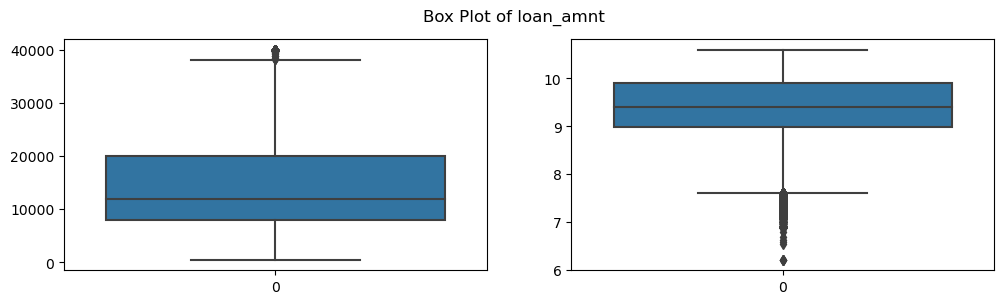

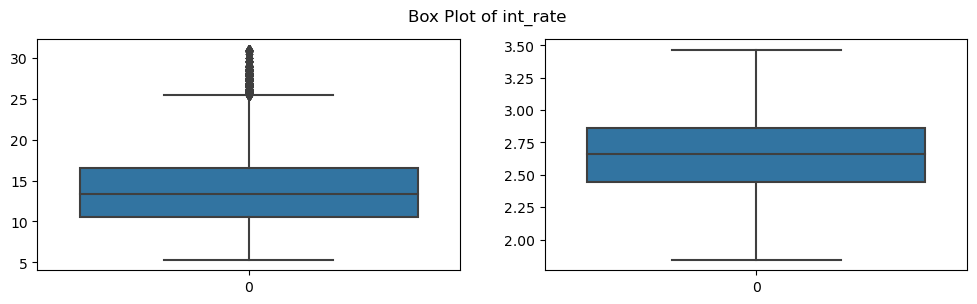

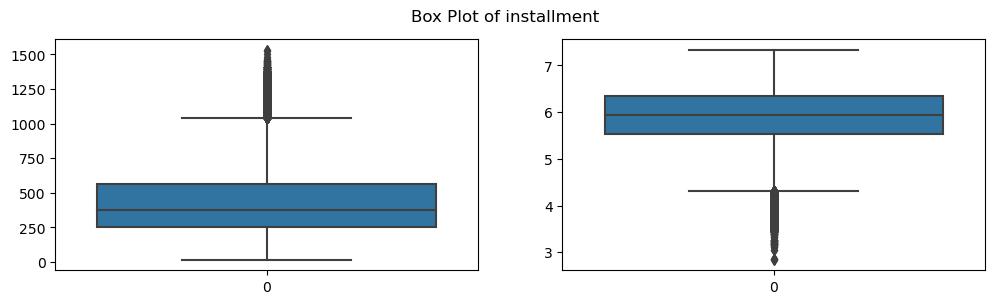

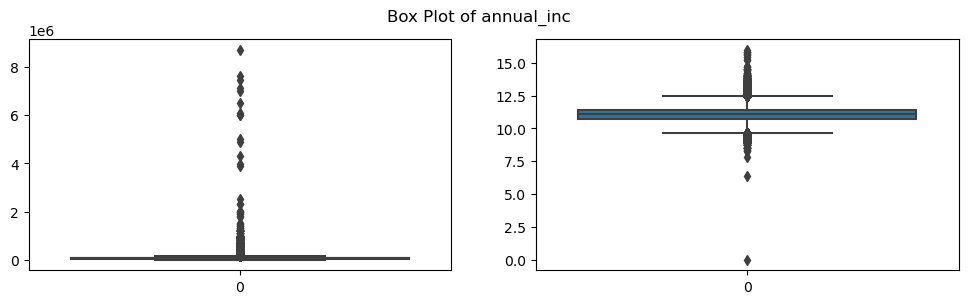

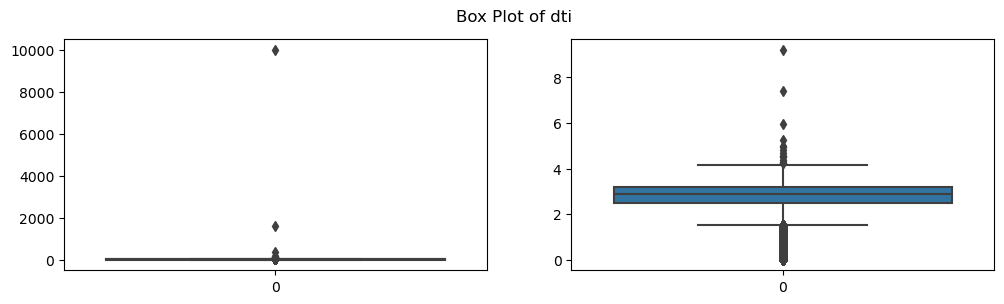

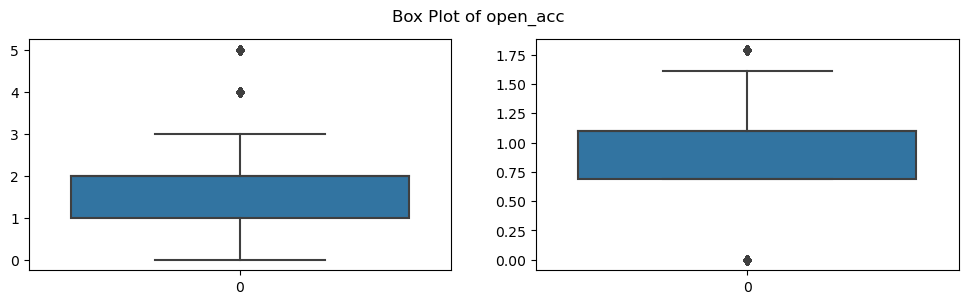

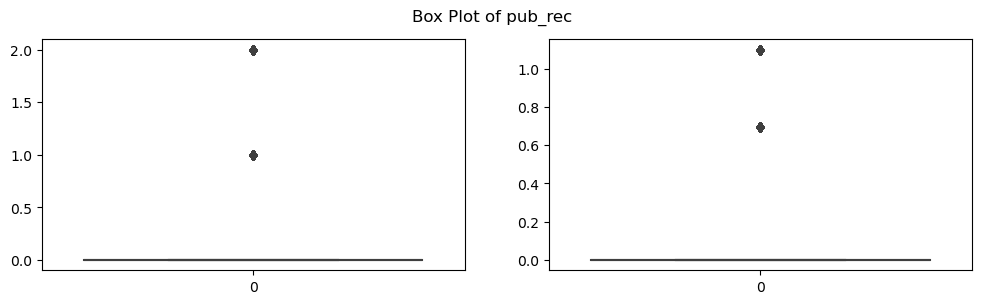

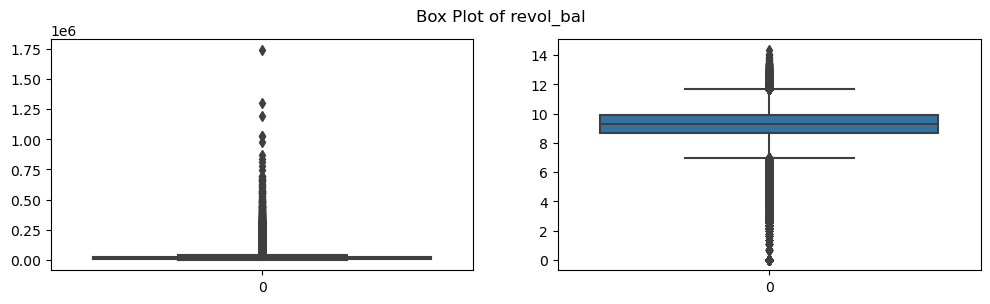

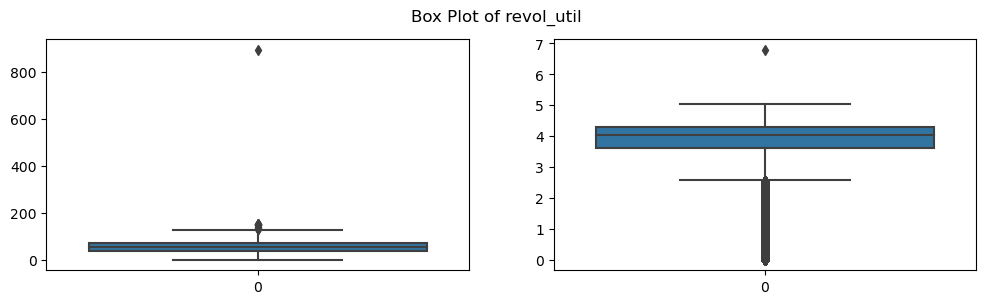

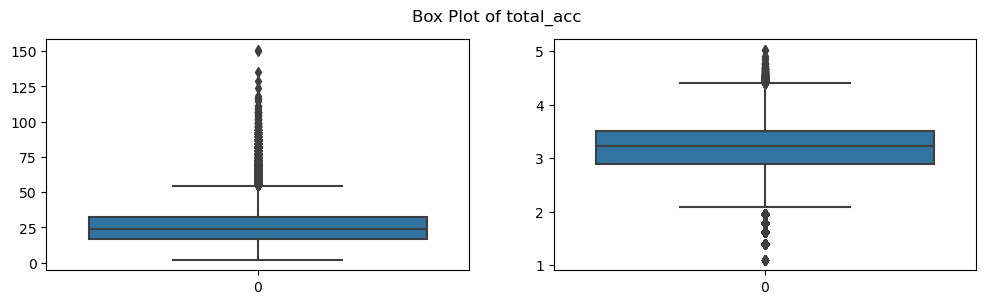

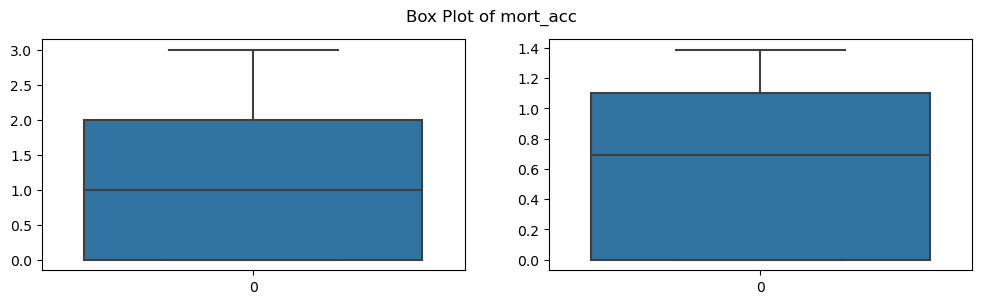

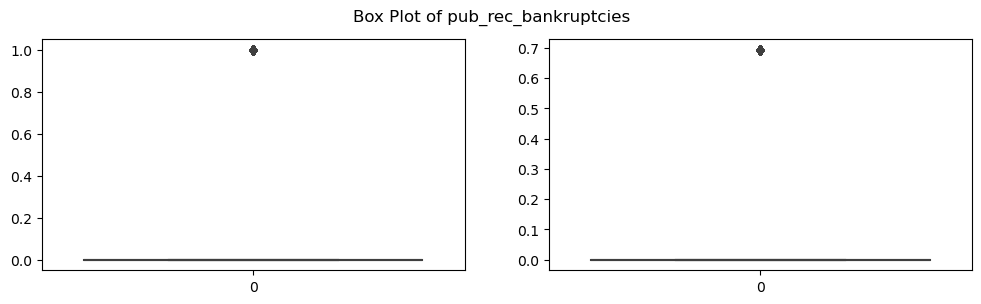

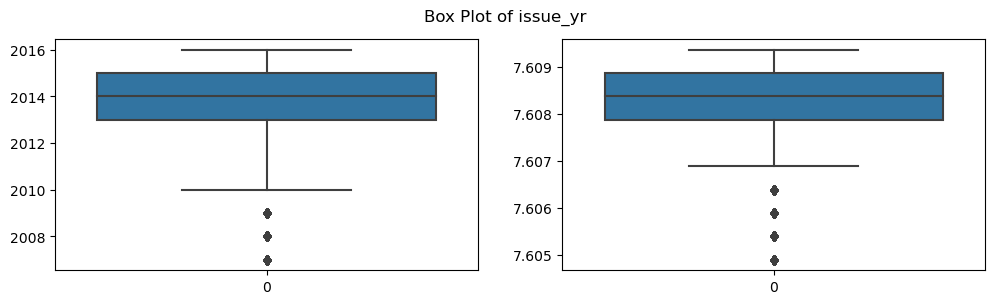

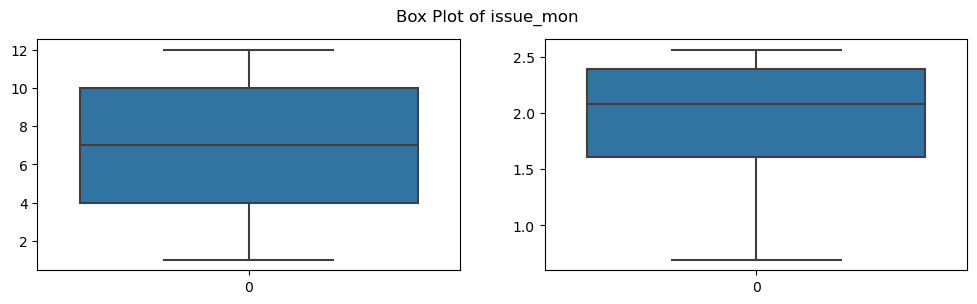

In [293]:
for feature in num_features:
    plt.figure(figsize=(12,3))
    iqr = outlier_detection(df, feature)
    print(feature, iqr, len(df[df[feature] > iqr[1]][feature]))
    plt.suptitle("Box Plot of " + feature)
    plt.subplot(1,2,1)
    sns.boxplot(df[feature])
    plt.subplot(1,2,2)
    sns.boxplot(np.log1p(df[feature]))

installment (11250, 1042.7549999999999) 11250
annual_inc (16700, 157500.0) 16700
dti (275, 40.53) 275
open_acc (27566, 3.5) 27566
pub_rec (57758, 0.0) 57758
revol_bal (21259, 40012.5) 21259
revol_util (12, 128.40000000000003) 12
total_acc (8499, 54.5) 8499
mort_acc (0, 5.0) 0
pub_rec_bankruptcies (45115, 0.0) 45115
issue_yr (0, 2018.0) 0
issue_mon (0, 19.0) 0


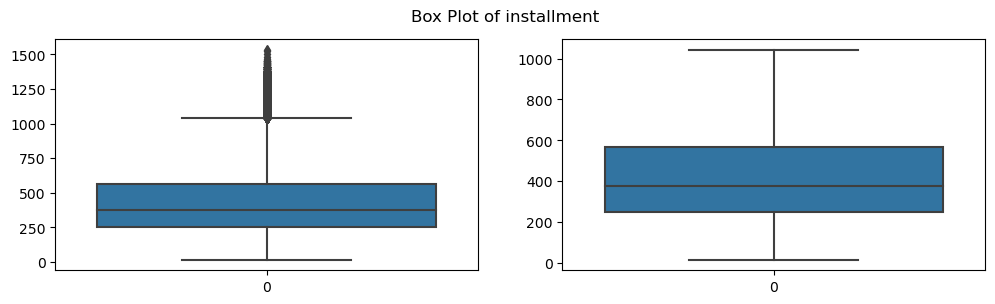

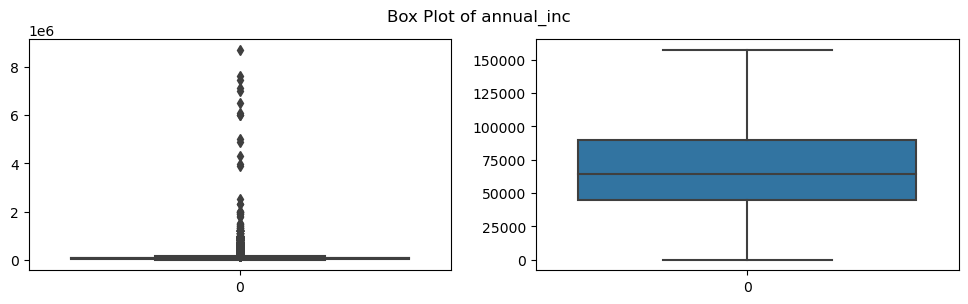

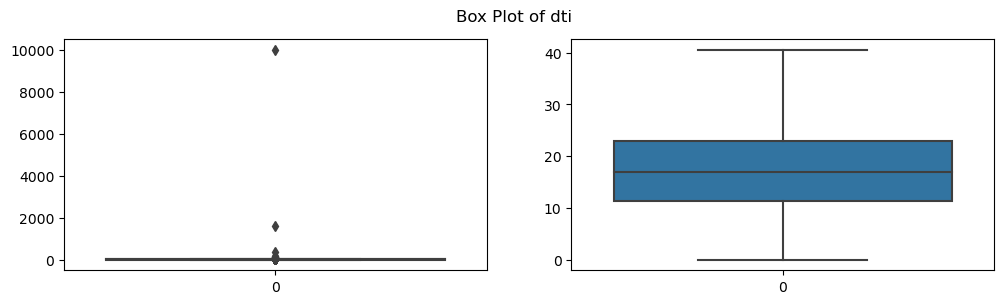

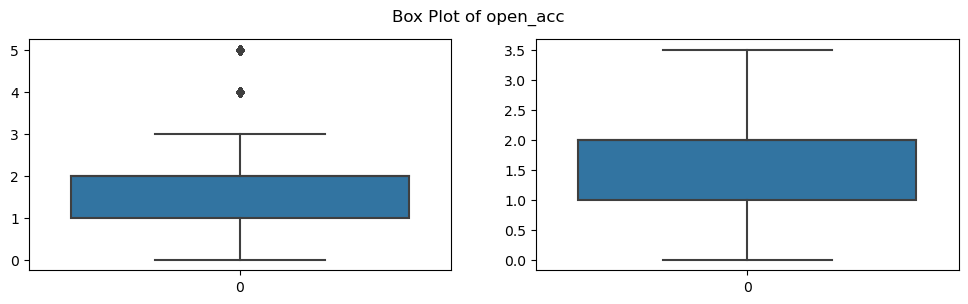

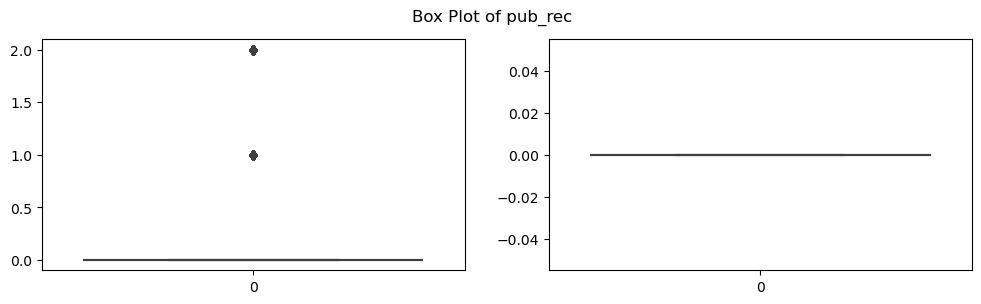

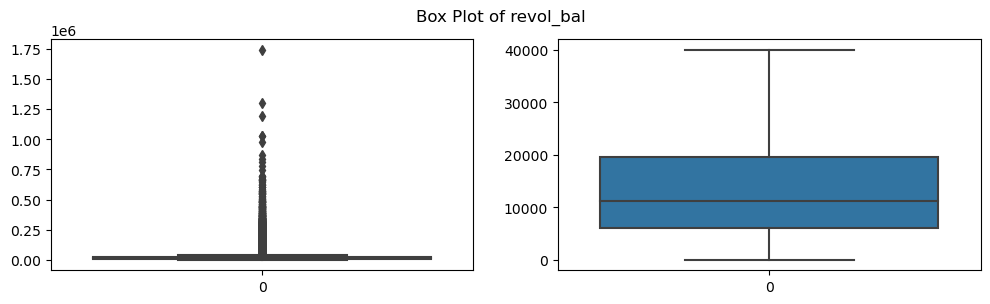

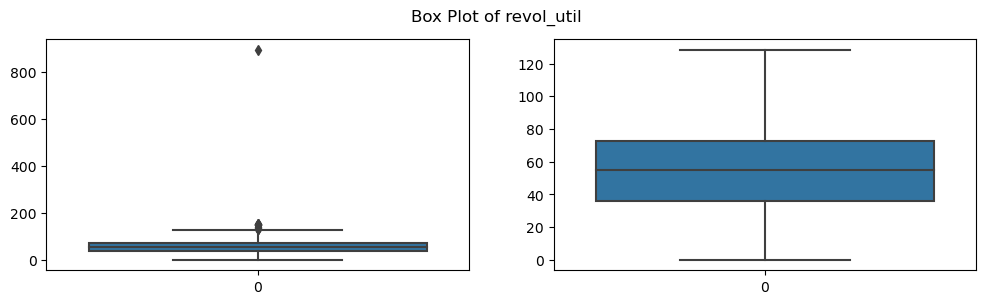

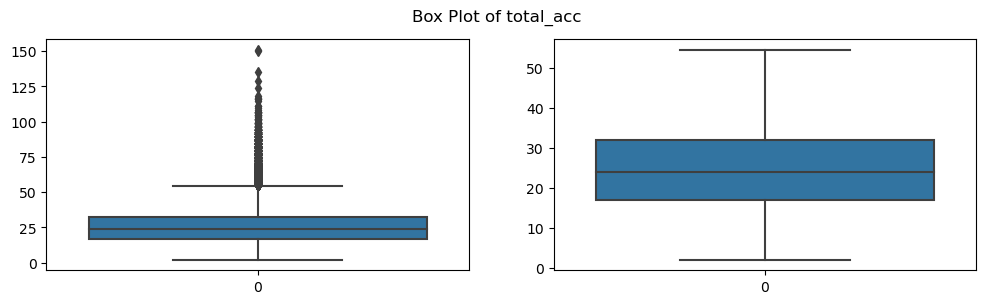

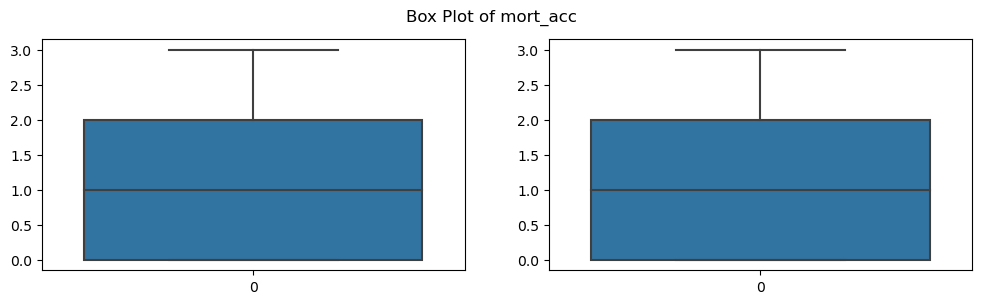

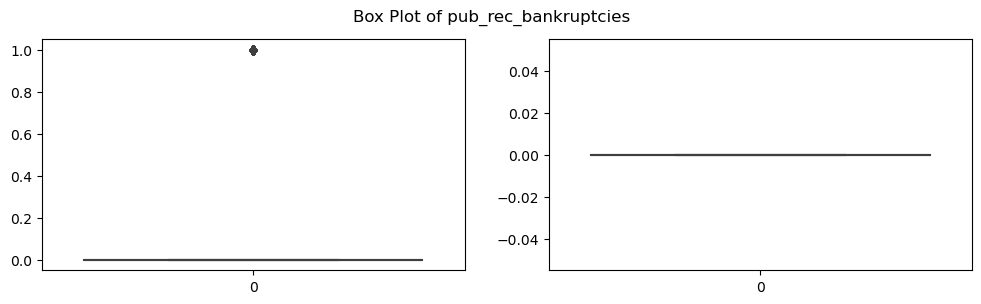

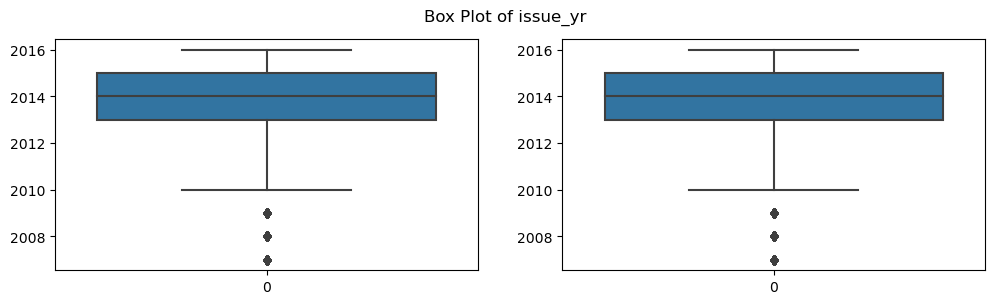

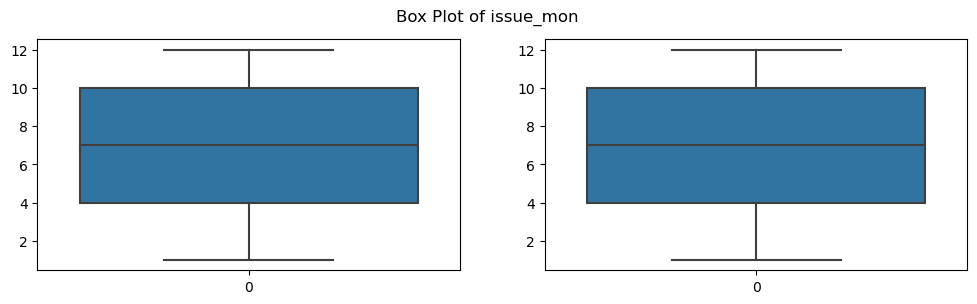

In [294]:
skip = ['loan_amnt', 'int_rate']
for feature in num_features:
    if feature in skip:
        continue
    plt.figure(figsize=(12,3))
    iqr = outlier_detection(df, feature)
    print(feature, iqr, len(df[df[feature] > iqr[1]][feature]))
    plt.suptitle("Box Plot of " + feature)
    plt.subplot(1,2,1)
    sns.boxplot(df[feature])
    plt.subplot(1,2,2)
    df.loc[df[feature]>iqr[1],feature] = iqr[1]
    sns.boxplot(df[feature])


#### Inference:
- Outlier is not much significant for loan_amnt, hence can be ignored
- Outliers of int rate is handled using log transformation
- For other features, as the log transformation the outlier is far from the q3, hence upper bound is limited with iqr*1.5
- No Null values are observed
- From the above plot, No outliers are detected in numerical features

## Feature Engineering:
- Transform Features
- Categorical Encoding
- PCA

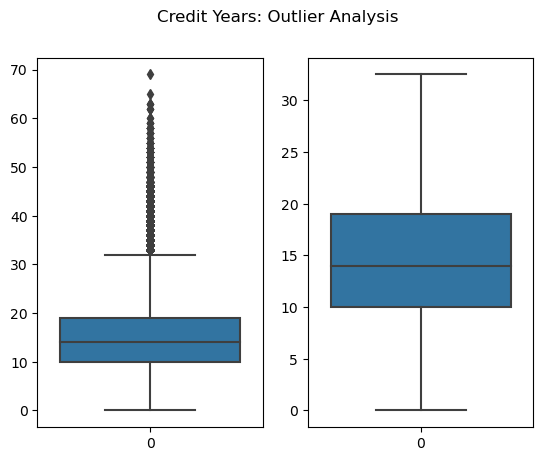

In [295]:
# Date Credit line to No. of credit years 
#Taken Max year in the dataset as reference

df['credit_years'] = max(df['earliest_cr_line'].dt.year) - df['earliest_cr_line'].dt.year
iqr = outlier_detection(df, 'credit_years')
plt.subplot(1,2,1)
sns.boxplot((max(raw_df['earliest_cr_line'].dt.year) - raw_df['earliest_cr_line'].dt.year))
df.loc[df['credit_years']>iqr[1],'credit_years'] = iqr[1]
plt.subplot(1,2,2)
sns.boxplot((df['credit_years']))
plt.suptitle("Credit Years: Outlier Analysis")
plt.show()

In [296]:
# Transform issue date to only year column
df['issue_year'] = df['issue_d'].dt.year

In [297]:
# Remove the base features earliest_cr_line and issue_d
df.drop(['earliest_cr_line', 'issue_d'], axis=1, inplace=True)

In [298]:
nominal_cat = ['home_ownership', 'verification_status','purpose', 'initial_list_status', 'application_type', 'pincode', 'loan_status']
ordinal_cat = ['term', 'grade', 'sub_grade', 'emp_length', 'open_acc', 'pub_rec', 'mort_acc', 'pub_rec_bankruptcies']
num_features = [feature for feature in list(df.columns) if feature not in nominal_cat + ordinal_cat]

In [299]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

## Categorical Encoding

In [300]:
#Target Encoding based on frequency is applied to all ordinal features
for feature in nominal_cat:
    df[feature] = df[feature].map(df[feature].value_counts())

In [301]:
#Label Encoding for nominal features 'term', 'grade', 'sub_grade'
l1 = ['term', 'grade', 'sub_grade']
for feature in l1:
    feature_enc = dict(zip(sorted(df[feature].unique()), np.arange(1, len(df[feature].unique())+1)))
    df[feature] = df[feature].map(feature_enc)

In [302]:
#Label Encoding for nominal features emp_length
feature_enc = {'< 1 year':1, '0 to 2':2, '3 to 5':3, '6 to 9':4, '10+ years':5}
df['emp_length'] = df['emp_length'].map(feature_enc)

In [303]:
#Label Encoding for nominal features 'open_acc', 'pub_rec', 'mort_acc', 'pub_rec_bankruptcies'
l2 = ['open_acc', 'pub_rec', 'mort_acc', 'pub_rec_bankruptcies']
for feature in l2:
    df[feature] = df[feature].astype('int')
    df[feature] = df[feature].apply(lambda x: x+1)

In [304]:
df['loan_status'] = df['loan_status'].map({318357:1,  77673:0})

In [305]:
df

loan_amnt  term  int_rate  installment  grade  sub_grade  emp_length  \
0         10000.0     1     11.44       329.48      2          9           5   
1          8000.0     1     11.99       265.68      2         10           3   
2         15600.0     1     10.49       506.97      2          8           1   
3          7200.0     1      6.49       220.65      1          2           4   
4         24375.0     2     17.27       609.33      3         15           4   
...           ...   ...       ...          ...    ...        ...         ...   
396025    10000.0     2     10.99       217.38      2          9           2   
396026    21000.0     1     12.29       700.42      3         11           3   
396027     5000.0     1      9.99       161.32      2          6           5   
396028    21000.0     2     15.31       503.02      3         12           5   
396029     2000.0     1     13.61        67.98      3         12           5   

        home_ownership  annual_inc  verification_status  loan_status  purpose  \
0               159790    117000.0               125082            1    78504   
1               198348     65000.0               125082            1   234507   
2               159790     43057.0               131385            1    83019   
3               159790     54000.0               125082            1    83019   
4               198348     55000.0               139563            0    83019   
...                ...         ...                  ...          ...      ...   
396025          159790     40000.0               131385            1   234507   
396026          198348    110000.0               131385            1   234507   
396027          159790     56500.0               139563            1   234507   
396028          198348     64000.0               139563            1   234507   
396029          159790     42996.0               139563            1   234507   

          dti  open_acc  pub_rec  revol_bal  revol_util  total_acc  \
0       26.24         4        1    36369.0        41.8       25.0   
1       22.05         4        1    20131.0        53.3       27.0   
2       12.79         3        1    11987.0        92.2       26.0   
3        2.60         2        1     5472.0        21.5       13.0   
4       33.95         3        1    24584.0        69.8       43.0   
...       ...       ...      ...        ...         ...        ...   
396025  15.63         2        1     1990.0        34.3       23.0   
396026  21.45         2        1    40012.5        95.7        8.0   
396027  17.56         4        1    32704.0        66.9       23.0   
396028  15.88         2        1    15704.0        53.8       20.0   
396029   8.32         1        1     4292.0        91.3       19.0   

        initial_list_status  application_type  mort_acc  pub_rec_bankruptcies  \
0                    157964            395319         1                     1   
1                    238066            395319         3                     1   
2                    238066            395319         1                     1   
3                    238066            395319         1                     1   
4                    238066            395319         2                     1   
...                     ...               ...       ...                   ...   
396025               157964            395319         1                     1   
396026               238066            395319         2                     1   
396027               238066            395319         1                     1   
396028               238066            395319         3                     1   
396029               238066            395319         1                     1   

        pincode  issue_yr  issue_mon  credit_years  issue_year  
0         56527      2015          1          23.0        2015  
1         45402      2015          1           9.0        2015  
2         45402      2015          1           6.0        2015  


In [306]:
df_backup = df.copy()

#### Inference:
- earliest_cr_line is transformed to credit years and only year is extracted from issue date as new features
- For logistic regression modeling, all categorical features are encoded
    - Target encoding for Nominal features (replaced with its frequency)
    - Label encoding for Ordinal features is performed

## Principal Component Analysis

In [227]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [228]:
n = len(df.columns)-1
pl = Pipeline([
    ('Scaling', StandardScaler()),
    ('PCA', PCA(n_components=n))
])

In [229]:
pl.fit(df.drop('loan_status', axis=1))
pca_features = pl.transform(df.drop('loan_status', axis=1))
pca_model = pl.named_steps['PCA']

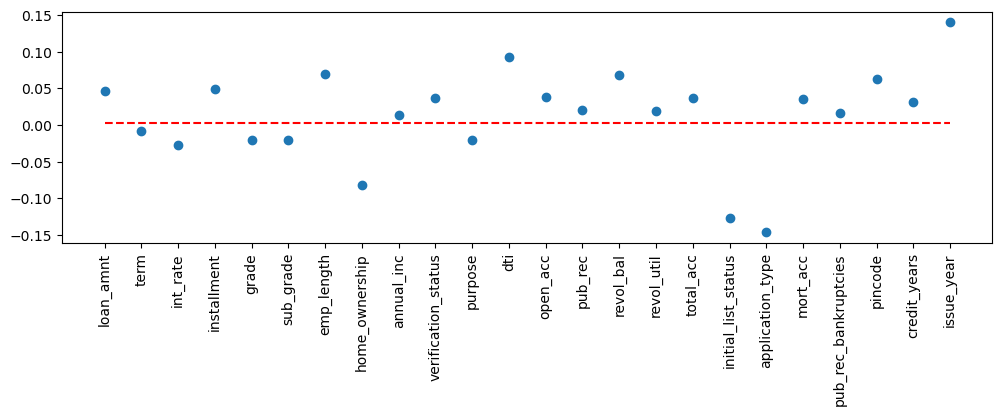

In [258]:
plt.figure(figsize=(12,3))
plt.plot(list(df.drop('loan_status', axis=1).columns), np.mean(pca_model.components_[0:10], axis=0),'o')
plt.xticks(rotation=90)
plt.hlines(pca_model.components_[0:15].mean(), xmin=0, xmax=23, colors='r', linestyles='dashed')
plt.show()


#### Inference:
- The first principal component, which explains approximately 65% of the variance in the data, is constructed with nearly equal contributions from all features in the dataset
- Since all the features equally contribute for PC1, all are comparably important in explaining the variance of the dataset

<Axes: >

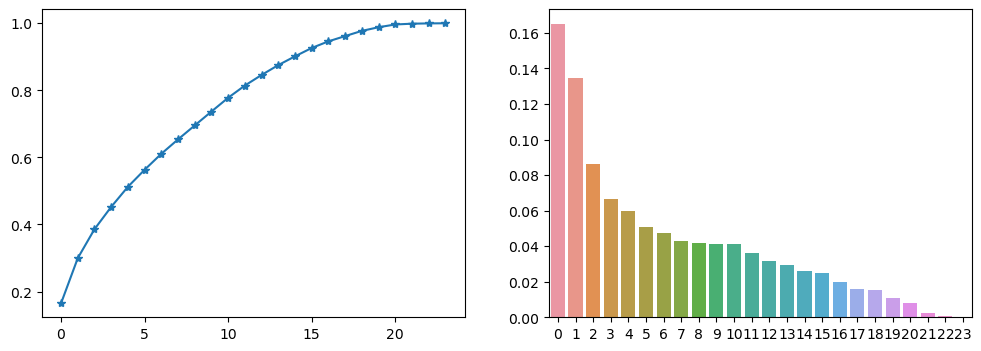

In [251]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(np.cumsum(pca_model.explained_variance_ratio_), marker="*")
plt.subplot(1,2,2)
sns.barplot(x= np.arange(len(pca_model.explained_variance_ratio_)), y=pca_model.explained_variance_ratio_)

#### Inference:
- Out of 24 features from the dataset, First 5 principal components captures >60% of variance in data
- Dimensionality reduction is possible by reducing 4-5 features as it captures <5% of variance in data

# Statistical Tests
- T-Test: 2 Sample T-Test
    - Target Vs Numerical Features
- Contingency Test: Test of Independence
    - Between Categorical Features

## 2 Sample T-Test

In [259]:
from scipy.stats import f_oneway, ttest_ind, chi2_contingency
from itertools import combinations

In [275]:
def two_sample_ttest(df, feature):
    samp1 = df[df['loan_status'] == 1][feature]
    samp2 = df[df['loan_status'] == 0][feature]
    tstat, pval = stats.ttest_ind(samp1, samp2, alternative = 'two-sided')
    if pval < 0.05:
        print(f"The means of the {feature}: {np.mean(samp1).round(2)},{np.mean(samp2).round(2)} are significantly different (reject null hypothesis).")
    else:
        print(f"No significant difference between the means of the {feature}: {np.mean(samp1).round(2)},{np.mean(samp2).round(2)} (fail to reject null hypothesis).")

In [276]:
for feature in num_features:
    two_sample_ttest(df, feature)

The means of the loan_amnt: 13866.88,15126.3 are significantly different (reject null hypothesis).
The means of the int_rate: 13.09,15.88 are significantly different (reject null hypothesis).
The means of the installment: 423.16,448.82 are significantly different (reject null hypothesis).
The means of the annual_inc: 72382.91,65278.4 are significantly different (reject null hypothesis).
The means of the dti: 16.81,19.52 are significantly different (reject null hypothesis).
No significant difference between the means of the revol_bal: 14181.81,14112.35 (fail to reject null hypothesis).
The means of the revol_util: 52.8,57.87 are significantly different (reject null hypothesis).
The means of the total_acc: 25.37,24.83 are significantly different (reject null hypothesis).
The means of the credit_years: 15.15,14.43 are significantly different (reject null hypothesis).
The means of the issue_year: 2013.58,2013.81 are significantly different (reject null hypothesis).


#### Inference:
- The means of the numerical features based on loan status show significant differences, suggesting that these features could effectively classify loan status.
- However, for the feature revol_bal, the means are not significantly different, indicating that this feature may have limited utility in distinguishing between loan statuses during modeling

In [312]:
def chitest(df, feature):
    ct = pd.crosstab(df['loan_status'], df[feature])
    chi_stat, p_value, _, exp_freq = chi2_contingency(ct)
    if p_value < 0.05:
        print(f"The {feature} and loan status are significantly dependent (reject null hypothesis)")
    else:
        print(f"The {feature} and target are significantly independent (fail to reject null hypothesis)")

In [313]:
for feature in nominal_cat + ordinal_cat:
    chitest(df, feature)

The home_ownership and loan status are significantly dependent (reject null hypothesis)
The verification_status and loan status are significantly dependent (reject null hypothesis)
The purpose and loan status are significantly dependent (reject null hypothesis)
The initial_list_status and loan status are significantly dependent (reject null hypothesis)
The application_type and loan status are significantly dependent (reject null hypothesis)
The pincode and loan status are significantly dependent (reject null hypothesis)
The loan_status and loan status are significantly dependent (reject null hypothesis)
The term and loan status are significantly dependent (reject null hypothesis)
The grade and loan status are significantly dependent (reject null hypothesis)
The sub_grade and loan status are significantly dependent (reject null hypothesis)
The emp_length and loan status are significantly dependent (reject null hypothesis)
The open_acc and loan status are significantly dependent (reject 

#### Inference:
- The contingency test confirms that loan status is dependent on most of the categorical features, suggesting their effectiveness in classifying loan status.
- However, the features pub_rec and pub_rec_bankruptcies show no dependency on loan status, indicating that these features may have limited influence on classification.

# Modeling
- Train Test Split and Feature Scaling
- Linear Regression
    - Performance Analysis using MAE, MSE and Adj R2 Score
- Polynomial Regression
    - KFold CV and Hyperparameter Tuning
- Lasso Regression
- Ridge Regression

## Data Preparation for Modeling

In [314]:
scaler = StandardScaler()
X = df.drop('loan_status', axis=1)
Y = df['loan_status']

In [315]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.3, random_state=101, shuffle=True)
xtrain_scaled = scaler.fit_transform(xtrain)
xtest_scaled = scaler.transform(xtest)
ytrain.reset_index(drop=True, inplace=True)
ytest.reset_index(drop=True, inplace=True)

In [318]:
xtrain.head()

loan_amnt  term  int_rate  installment  grade  sub_grade  emp_length  \
71129     18600.0     1     15.88       652.82      3         14           4   
313981    26400.0     1     11.53       870.95      2         10           4   
378748    10000.0     1     12.99       336.90      2          9           3   
92328     18725.0     2     17.86       474.07      4         20           5   
214745     5000.0     1     15.88       175.49      3         14           5   

        home_ownership  annual_inc  verification_status  purpose    dti  \
71129           198348     91000.0               139563   234507  26.60   
313981           37746     76762.0               125082   234507  33.06   
378748          198348     50000.0               131385    78504  24.62   
92328           198348     50000.0               131385   234507  27.48   
214745          198348     85000.0               125082    78504  23.10   

        open_acc  pub_rec  revol_bal  revol_util  total_acc  \
71129          3        1    24146.0        95.1       27.0   
313981         3        1    23077.0        51.7       27.0   
378748         2        1     3811.0        24.0       12.0   
92328          2        1     9453.0        38.3       16.0   
214745         3        1    25431.0        83.4       26.0   

        initial_list_status  application_type  mort_acc  pub_rec_bankruptcies  \
71129                238066            395319         3                     1   
313981               157964            395319         2                     1   
378748               157964            395319         2                     1   
92328                157964            395319         1                     1   
214745               238066            395319         3                     1   

        pincode  issue_yr  issue_mon  credit_years  issue_year  
71129     56527      2013          7          13.0        2013  
313981    56985      2015          7          29.0        2015  
378748    56546      2013          9          14.0        2013  
92328     33358      2014         11          24.0        2014  
214745    56546      2013          8          15.0        2013

## Logistic Regression

In [322]:
lor = LogisticRegression()
lor.fit(xtrain_scaled, ytrain)

LogisticRegression()

In [365]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_curve, auc, precision_recall_curve

In [337]:
ypred = lor.predict(xtest_scaled)
ypred_prob = lor.predict_proba(xtest_scaled)[:,1]

array([0.54671097, 0.79022858, 0.87710802, ..., 0.8636304 , 0.95898656,
       0.94207409])

### Results Analysis

In [371]:
def performance_metrics(ytest, ypred):
    tn, fp, fn, tp = confusion_matrix(ytest, ypred).ravel()
    actual_pos = tp + fn
    actual_neg = fp + tn
    print("True Positive Rate: ", round(tp/actual_pos,2))
    print("True Negative Rate: ", round(tn/actual_neg,2))
    print("False Positive Rate: ", round(fp/actual_neg,2))
    print("False Negative Rate: ", round(fn/actual_pos,2))
    print("Accuracy: ", accuracy_score(ypred,ytest).round(2))
    print("Precision: ", precision_score(ypred,ytest).round(2))
    print("Recall: ", recall_score(ypred,ytest).round(2))

In [372]:
performance_metrics(ytest, ypred)

True Positive Rate:  0.98
True Negative Rate:  0.27
False Positive Rate:  0.73
False Negative Rate:  0.02
Accuracy:  0.84
Precision:  0.98
Recall:  0.85


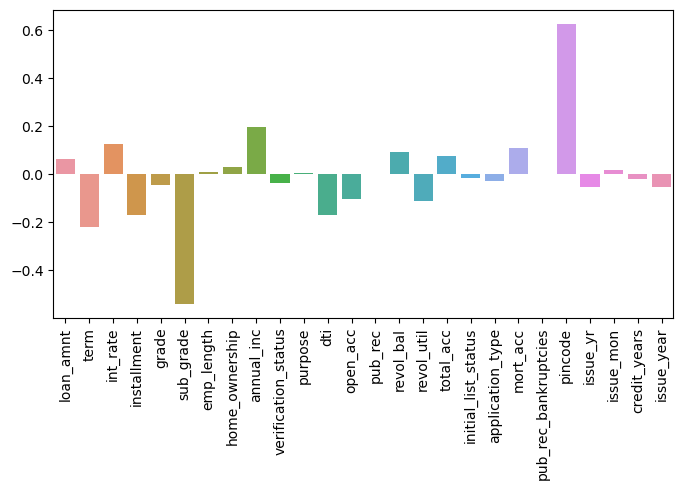

In [360]:
plt.figure(figsize=(8,4))
sns.barplot(y=list(lor.coef_[0]), x=list(xtrain.columns))
plt.xticks(rotation=90)
plt.show()

#### Inference:
- The regression coefficients indicate that subgrade and pincode provides major contribution to the model.
- Conversely, pub_rec and pub_rec_bankruptcies show negligible contribution, suggesting minimal impact on the target variable.
- Features such as term, installment, annual_inc, dti, and mort_acc also demonstrate significant contributions to the model.

### ROC Curve

In [373]:
def plot_roc(ytest, ypred_prob):
    fpr, tpr, thresholds = roc_curve(ytest, ypred_prob)
    plt.plot(fpr, tpr, label='ROC Curve (Area: ' + str(auc(fpr, tpr).round(2)) + ')' )
    plt.plot([0, 1], [0, 1], 'k--', label='Average')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()

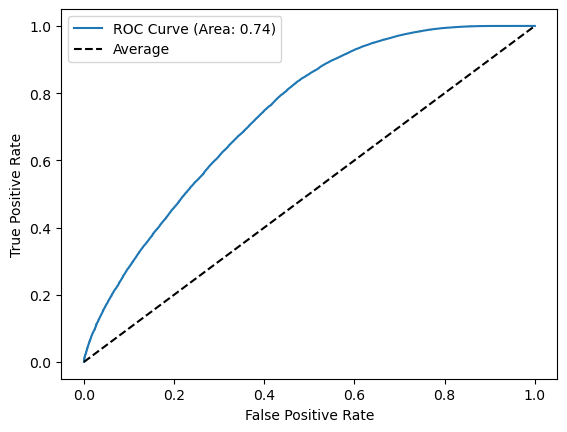

In [374]:
plot_roc(ytest, ypred_prob)

#### Inference:
- AUC of 0.74 indicates that the model has a moderate level of discriminatory ability. This means the model can differentiate between the positive and negative classes better than random guessing
- Class imbalancing needs to addressed to improve the performance

### Precision Recall Curve

In [375]:
def plot_roc(ytest, ypred_prob):
    precision, recall, thresholds = precision_recall_curve(ytest, ypred_prob)
    no_skill = len(ytest[ytest==1]) / len(ytest)
    plt.plot(recall, precision, label='Precision Recall Curve (Area: ' + str(auc(recall, precision).round(2)) + ')' )
    plt.plot([0, 1], [no_skill, no_skill], 'k--', label='Average')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()

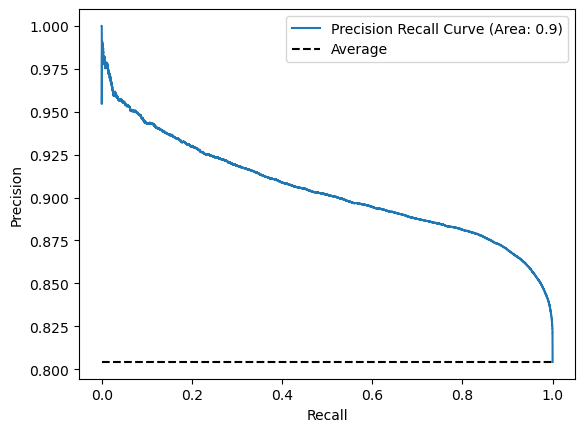

In [376]:
plot_roc(ytest, ypred_prob)

#### Inference:
- MSE between test and train set is similar, hence there is no overfitting
- R2 score is not significant hence the performance of the model is average 

## Address Class Imbalance 
- SMOTE
- Class Weightage

### SMOTE and Results

In [392]:
from imblearn.over_sampling import SMOTE

ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py)

In [384]:
from sklearn.neighbors import NearestNeighbors

In [390]:
def smote(X, y, minority_class, n_samples):
    if minority_class not in y:
        raise ValueError(f"Minority class {minority_class} not found in target labels.")
    
    X_minority = X[y == minority_class]
    if X_minority.shape[0] == 0:
        raise ValueError(f"No samples found for minority class {minority_class}.")
    
    print("X_minority shape:", X_minority.shape)  # Debugging statement

    n_minority = X_minority.shape[0]

    # Find k nearest neighbors for minority class samples
    k_neighbors = 5
    if n_minority < k_neighbors:
        raise ValueError(f"Not enough samples in the minority class to find {k_neighbors} neighbors.")
    
    nn = NearestNeighbors(n_neighbors=k_neighbors + 1).fit(X_minority)
    neighbors = nn.kneighbors(X_minority, return_distance=False)[:, 1:]  # Exclude itself (1:)
    
    # Generate synthetic samples
    synthetic_samples = []
    for _ in range(n_samples):
        # Randomly select a minority class sample and one of its neighbors
        sample_idx = np.random.randint(0, n_minority)
        neighbor_idx = np.random.choice(neighbors[sample_idx])

        # Get the selected sample and its neighbor
        sample = X_minority[sample_idx]
        neighbor = X_minority[neighbor_idx]

        # Generate a synthetic sample by interpolating
        diff = neighbor - sample
        gap = np.random.rand()
        synthetic_sample = sample + gap * diff
        synthetic_samples.append(synthetic_sample)

    # Combine original data with synthetic samples
    X_synthetic = np.array(synthetic_samples)
    y_synthetic = np.full((n_samples,), minority_class)

    X_resampled = np.vstack([X, X_synthetic])
    y_resampled = np.hstack([y, y_synthetic])

    return X_resampled, y_resampled

In [391]:
minority_class = 0
n_samples_to_generate = 3
X_resampled, y_resampled = smote(np.array(X), np.array(Y), minority_class, n_samples_to_generate)

X_minority shape: (77673, 26)


AttributeError: 'NoneType' object has no attribute 'split'

#### Inference:
- GRE SCore, TOEFL Score, CGPA, LOR are given higher weightage indicating the significance of the features for the prediction
- Weightages of all the features are positive indicating the positive correlation

In [59]:
lir.intercept_

0.718075

## Polynomial Regression

In [61]:
def poly_reg(xtrain, ytrain, xtest, ytest):    
    poly_lir = LinearRegression()
    poly_lir.fit(xtrain, ytrain)
    train_score = performance_analysis(poly_lir.predict(xtrain), ytrain, k=xtrain.shape[1])
    test_score = performance_analysis(poly_lir.predict(xtest), ytest, k=xtest.shape[1])
    return train_score, test_score

In [62]:
poly_reg(xtrain, ytrain, xtest, ytest)
train_score, test_score= poly_reg(xtrain, ytrain, xtest, ytest)
poly_lir_res = pd.DataFrame(data=[train_score, test_score], columns=['MAE', 'RMSE', 'R2 Score', 'Adj R2 Score'], index=['Train', 'Test'])
poly_lir_res.head()

MAE   RMSE  R2 Score  Adj R2 Score
Train  0.059  0.042     0.830         0.827
Test   0.061  0.044     0.777         0.760

In [63]:
# Apply Polynomial of degree 2
poly = PolynomialFeatures(degree=2)
xtrain_poly = poly.fit_transform(xtrain)
xtest_poly = poly.transform(xtest)

#Apply Scaling
ss = StandardScaler()
xtrain_poly_scaled = ss.fit_transform(xtrain_poly)
xtest_poly_scaled = ss.transform(xtest_poly)

train_score, test_score= poly_reg(xtrain_poly_scaled, ytrain, xtest_poly_scaled, ytest)
poly_lir_res = pd.DataFrame(data=[train_score, test_score], columns=['MAE', 'RMSE', 'R2 Score', 'Adj R2 Score'], index=['Train', 'Test'])
poly_lir_res.head()

MAE   RMSE  R2 Score  Adj R2 Score
Train  0.056  0.039     0.848         0.833
Test   0.063  0.047     0.767         0.634

In [64]:
#Apply Scaling
ss = StandardScaler()
xtrain_scaled = ss.fit_transform(xtrain)
xtest_scaled = ss.transform(xtest)

# Apply Polynomial of degree 2
poly = PolynomialFeatures(degree=2)
xtrain_poly_scaled = poly.fit_transform(xtrain_scaled)
xtest_poly_scaled = poly.transform(xtest_scaled)

train_score, test_score= poly_reg(xtrain_poly_scaled, ytrain, xtest_poly_scaled, ytest)
poly_lir_res = pd.DataFrame(data=[train_score, test_score], columns=['MAE', 'RMSE', 'R2 Score', 'Adj R2 Score'], index=['Train', 'Test'])
poly_lir_res.head()

MAE   RMSE  R2 Score  Adj R2 Score
Train  0.056  0.039     0.848         0.833
Test   0.063  0.047     0.767         0.634

#### Inference:
- Slight improvement in RMSE with respect to linear regression
- R2 score is almost same, no improvement in the performance is evident
- Increase degree of polynomial by hyperparameter tuning

### Hyperparameter Tuning: Degree of Polynomials

In [66]:
degrees = [3, 5, 7, 9]
kf = KFold(n_splits=5)
metric = []
for deg in [2]:
    poly = PolynomialFeatures(degree=deg)
    xtrain_poly = poly.fit_transform(xtrain_scaled)
    xtest_poly = poly.transform(xtest_scaled)    
    for train_index, val_index in kf.split(xtrain_poly, ytrain):
        xtrain_slice = xtrain_poly[train_index]
        ytrain_slice = ytrain[train_index]
        xval_slice = xtrain_poly[val_index]
        yval_slice = ytrain[val_index]
        train_score, val_score = poly_reg(xtrain_slice, ytrain_slice, xval_slice, yval_slice) 
        metric.append([train_score, val_score])

In [67]:
ytrain.reset_index(drop=True)

0      0.53
1      0.93
2      0.72
3      0.73
4      0.71
       ... 
395    0.56
396    0.63
397    0.94
398    0.84
399    0.73
Name: Chance of Admit , Length: 400, dtype: float64

# Assumptions of Linear Regression
- Multicollinearity Analysis
- Residual plot Analysis
- Linearity of variables
- Test for Homoscedasticity
- Normality of residuals

## Multicollinearity Analysis

In [86]:
VIF = [variance_inflation_factor(xtrain, i) for i in range(len(xtrain.columns))]
print([(list(xtrain.columns)[i],  VIF[i]) for i in range(len(xtrain.columns))])

[('GRE Score', 1320.463129851432), ('TOEFL Score', 1224.5392331156734), ('CGPA', 921.83366405054), ('University Rating', 21.819465877411755), ('SOP', 35.23376460964398), ('LOR ', 31.442054746602892), ('Research', 2.7925969690879637)]


<Axes: >

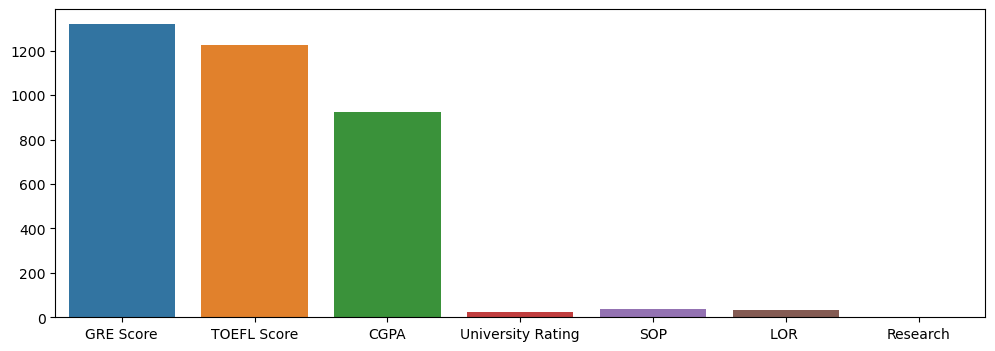

In [87]:
plt.figure(figsize=(12,4))
sns.barplot(x=list(xtrain.columns), y = VIF)

#### Inference:
- GRE, TOEFL Score and CGPA having very high VIF value indicating the high linear dependency of the features

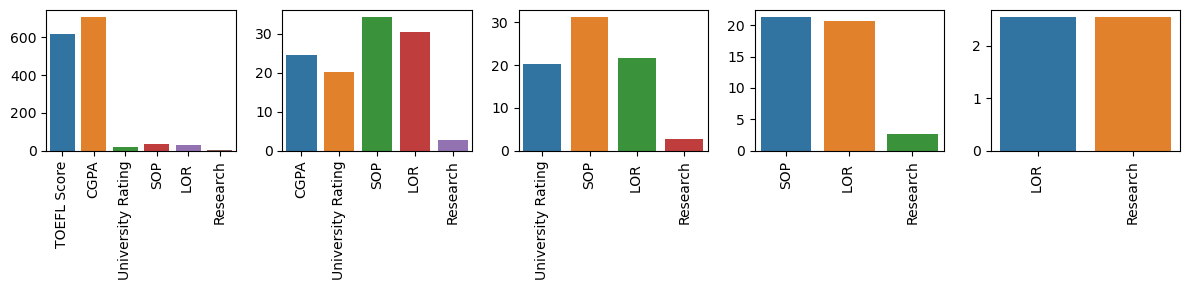

In [115]:
xtrain_new = xtrain.copy()
cols = list(xtrain_new.columns)
plt.figure(figsize=(12,3))
for i in range(len(cols)-2):
    xtrain_new.drop(cols[i], axis=1, inplace= True)
    plt.subplot(1,5,i+1)
    VIF = [variance_inflation_factor(xtrain_new, i) for i in range(len(xtrain_new.columns))]
    #print([(list(xtrain_new.columns)[i],  VIF[i]) for i in range(len(xtrain_new.columns))])
    sns.barplot(x=list(xtrain_new.columns), y = VIF)
    plt.xticks(rotation=90)
plt.tight_layout()

#### Inference:
- Without GRE Score, VIF is not changed significantly for other features
- Without GRE and TOEFL Score, VIF is drastically reduced for CGPA indicating the dependency of the 3 features
- Removing University rating and SOP, VIF of LOR is drastically reducted indicating the dependency of the 3 features
- Except research, all other features are having linear dependency with other features

In [89]:
xtrain_new = xtrain.copy()
xtest_new = xtest.copy()
cols = list(xtrain_new.columns)

for i in range(len(cols)-1): 
    xtrain_new.drop(cols[i], axis=1, inplace= True)
    xtest_new.drop(cols[i], axis=1, inplace= True)
    ss = StandardScaler()    
    lir = LinearRegression()
    lir.fit(ss.fit_transform(xtrain_new), ytrain)
    train_score = performance_analysis(lir.predict(ss.transform(xtrain_new)), ytrain, k=xtrain_new.shape[1])
    test_score = performance_analysis(lir.predict(ss.transform(xtest_new)), ytest, k=xtrain_new.shape[1])
    lir_res = pd.DataFrame(data=[train_score, test_score], columns=['MAE', 'RMSE', 'R2 Score', 'Adj R2 Score'], index=['Train', 'Test'])
    print(bold_start + "Performance of Linear Regression without " + cols[i] + ":" + bold_end)
    print(lir_res)
    

Performance of Linear Regression without GRE Score:
         MAE   RMSE  R2 Score  Adj R2 Score
Train  0.060  0.044     0.825         0.822
Test   0.062  0.045     0.773         0.758
Performance of Linear Regression without TOEFL Score:
         MAE   RMSE  R2 Score  Adj R2 Score
Train  0.062  0.045     0.812         0.810
Test   0.062  0.046     0.770         0.758
Performance of Linear Regression without CGPA:
         MAE   RMSE  R2 Score  Adj R2 Score
Train  0.085  0.065     0.647         0.643
Test   0.088  0.068     0.544         0.525
Performance of Linear Regression without University Rating:
         MAE   RMSE  R2 Score  Adj R2 Score
Train  0.090  0.068     0.609         0.606
Test   0.088  0.069     0.541         0.526
Performance of Linear Regression without SOP:
         MAE   RMSE  R2 Score  Adj R2 Score
Train  0.097  0.077     0.544         0.542
Test   0.099  0.080     0.416         0.404
Performance of Linear Regression without LOR :
         MAE   RMSE  R2 Score  Adj

#### Inference:
- Removing collinear features doesn't improve the performance but slightly reducing the performance

## Linearity Analysis

In [90]:
raw_df.corr().iloc[1:-1,-1]

GRE Score            0.810351
TOEFL Score          0.792228
University Rating    0.690132
SOP                  0.684137
LOR                  0.645365
CGPA                 0.882413
Research             0.545871
Name: Chance of Admit , dtype: float64

## Residual Plot Analysis

Text(0.5, 1.0, 'Residual Plot: Test Set')

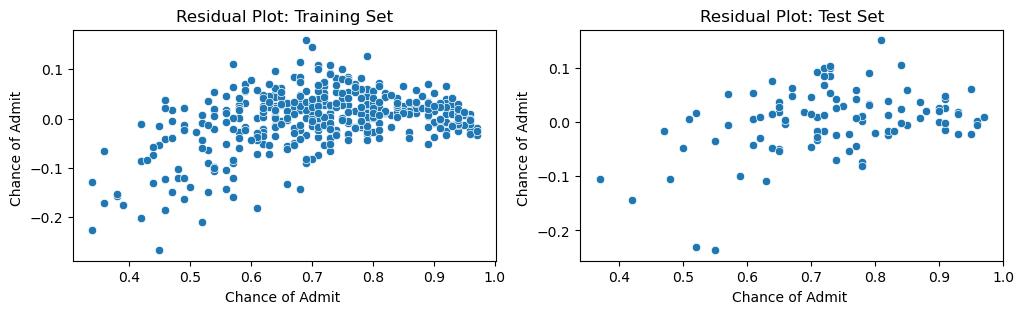

In [93]:
lir = LinearRegression()
lir.fit(xtrain_scaled, ytrain)
ypred = lir.predict(xtrain_scaled)
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
sns.scatterplot(x=ytrain, y = ytrain - lir.predict(xtrain_scaled))
plt.title('Residual Plot: Training Set')
plt.subplot(1,2,2)
sns.scatterplot(x=ytest, y = ytest - lir.predict(xtest_scaled))
plt.title('Residual Plot: Test Set')

#### Inference:
- All the features have high correlation with Target variable  
- A clear curvature in the residuals indicates non-linearity
- Non linear models is required to capture the non linearity in the data

## Normality of Residuals

In [100]:
#Side By Side Plot
def hist_box_plot(data, title):
    plt.figure(figsize=(12,3))
    plt.suptitle(title)
    plt.subplot(1,2,1)
    sns.histplot(data, kde=True, bins=20)
    plt.subplot(1,2,2)
    sns.boxplot(data)
    plt.xlabel('Residuals')

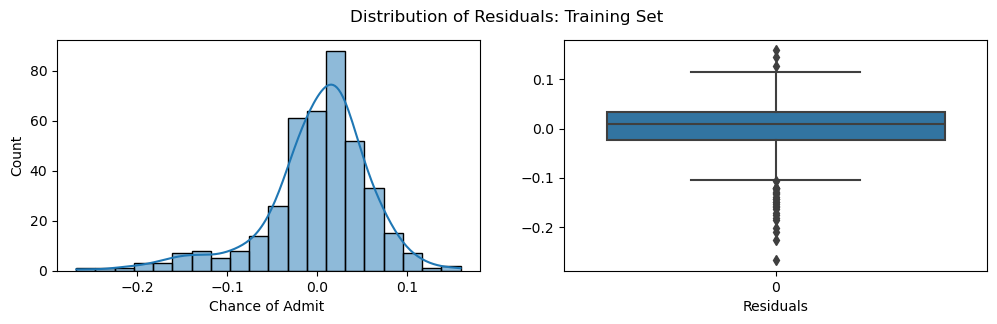

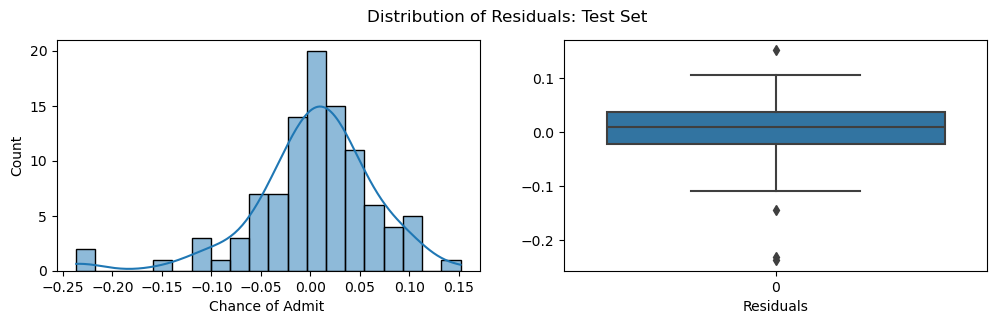

In [101]:
hist_box_plot(ytrain - lir.predict(xtrain_scaled), 'Distribution of Residuals: Training Set')
hist_box_plot(ytest - lir.predict(xtest_scaled), 'Distribution of Residuals: Test Set')

#### Inference:
- Residual is almost normally distributed with slight skew
- It satisfies the assumption of linear regression the normal distribution of residuals 

# Insights

- **Data Characteristics**
	- ***Serial No.***: 
		- All are Unique values might not be helpful for prediction, hence should be ignored before prediction
	- ***GRE Score, TOEFL Score***: 
		- Mean ~= Median indicating Central Tendency
		- Data is distributed normally and having spread out peak or flat peak
		- No gaps in distribution plot indicates the data is Continuous with no missing range 
	- ***Cumulative Grade Point Average (CGPA)***: 
		- Ranges from 6.8 to 9.92, 
		- Data is distributed normally and having sharp peak
		- Gap between 7 and 7.5 in the distribution plot indicates the missing range in the data
	- ***University Rating***: 
		- Ordinal Feature ranges from 1 to 5
		- Ratings in the range 2-4 being 80% of proportion
		- Average rated universities (3) are the most in dataset
	- ***Statement of Purpose (SOP)***: 
		- Ordinal Feature ranges from 1 to 5 with resolution 0.5
		- Strength in the range 2.5-4.5 being 80% of proportion
		- Lowest strength (1) is neglegible (1.2%) and can be ignored or merged
	- ***Letter of Recommendation (LOR)***: 
		- Ordinal Feature ranges from 1 to 5 with resolution 0.5
		- Strength in the range 3-4 being ~60% of proportion
		- Lowest strength (1) is neglegible (0.2%)
	- ***Research***: 
		- Binary categorical feature with equal distribution
    - ***Change of Admit***: 
		- Probability of getting Admission ranges from 0.4 to 1
- **Exploratory Data Analysis**	
	- `No null values and no iqr outliers` are identified indicating clean dataset
	- Students from `universities with higher ratings (3+) are more likely to have research experience`
	- Students `having research experience are more likely to have higher SOP and LOR strengths (3+)`
	- Students `having research experience are mostly likely to get higher scores in GRE, TOEFL and Curriculum`
	- Strength of relationship between categorical features: (University rating and SOP) > (University rating and LOR) > (SOP and LOR)
	- All 3 numerical features are highly linearly correlated
	- Students `having high CGPA are more likely to have higher GRE and TOEFL Score`
	- Students `scored more in the GRE, TOEFL and Curriculum are having higher SOP strength, LOR strength`
	- `Balanced distribution of the target` is observed for <0.5 (~50%) and > 0.5 (~50%)
	- `GRE Score, TOEFL Score and CGPA all are linearly correlated with Chance of getting Admission`
	- University rating, SOP, LOR and Research experience are positively and linearly correlated with Chance of Admission
	- ***PCA Analysis:***
		- The first principal component from PCA explains approximately 65% of the variance in the data
		- `The first principal component is constructed with nearly equal contributions from all features in the dataset`
		- Out of 7 features from the dataset, First 3 principal components captures >85% of variance in data
	- ***Statistical Tests:***
		- Chance of admission for each Category of `University Rating, LOR and SOP are significantly different` indicating the segregration is independent
		- The contingency test confirms that the `categorical features (University Rating, LOR and SOP) are significantly dependent on each other`
	- ***Linear Regression:***
		- Train: RMSE = 0.042, `R2 Score = 0.83`, Adj. R2 Score = 0.83
		  Test:  RMSE = 0.044, `R2 Score = 0.77`, Adj. R2 Score = 0.76
		- `Moderate performance` of the model
		- Based on the coefficients, `GRE SCore, TOEFL Score, CGPA, LOR are given higher weightage indicating the significance of the features` for the prediction
		- Weightages of all the features are positive indicating the positive correlation		
	- ***Polynomial Regression: (Degree = 2)***
		- Train: RMSE = 0.039, `R2 Score = 0.84`, Adj. R2 Score = 0.83
		  Test:  RMSE = 0.047, `R2 Score = 0.76`, Adj. R2 Score = 0.634
		- `Doesn't improve the performance` much
		- `Slightly overfits` based on the Train and Test RMSE
	- ***Ridge Regression:***
		- Train: RMSE = 0.042, `R2 Score = 0.83`, Adj. R2 Score = 0.83
		  Test:  RMSE = 0.044, `R2 Score = 0.77`, Adj. R2 Score = 0.76	
		- The test `performance of the model improves significantly compared to Linear Regression model`(7% improvement)
		- Increasing the regularization constant  increases RMSE and decreases R2 score which is undesirable
	- ***Lasso Regression:***
		- Train: RMSE = 0.042, `R2 Score = 0.83`, Adj. R2 Score = 0.82
		  Test:  RMSE = 0.043, `R2 Score = 0.82`, Adj. R2 Score = 0.80	
		- The test `performance of the  model improves significantly compared to Linear Regression model`(7% improvement) but same as that of Ridge
		- Increasing the regularization constant drastically increases RMSE and decreases R2 score which is undesirable		
		- Significant improvement observed at very low regularization constant values (<0.01)
	- ***Elastic Net Regression:***
		- Similar performance as that of Ridge and Lasso Regression, no significant improvement observed
	- ***Multicollinearity Analysis:***
		- GRE, TOEFL Score and CGPA having very high VIF value indicating the high linear dependency between the features
		- Without GRE and TOEFL Score, VIF is drastically reduced for CGPA indicating the dependency of the 3 features
		- Without University rating and SOP, VIF of LOR is drastically reducted indicating the dependency of the 3 features
	- `Removing collinear features doesn't improve the performance of linear regression model` but slightly reduces its performance
	- All the features have high correlation with Target variable and `the clear curvature in the residuals plot indicates non-linearity`
	- Residual is almost normally distributed with slight skew

# Recommendations

- **Data Preprocessing:**
	- As the population of certain categories are less in the following categorical features, categories can be merged
		- SOP: Ratings 1, 1.5 and 2.0 can be merged, 4.5 and 5.0 can be merged
		- LOR: Ratings 1, 1.5, 2.0 and 2.5 can be merged, 4.5 and 5.0 can be merged
		- University Rating: Ratings 1 and 2 can be merged, 4 and 5 can be merged
	- Transform all the ratings to ordinal categorical data
- **Modeling:**
	- Simple `Linear Regression model provides mediocre performance` hence non linear model can be applied
	- `Polynomial Regressiuon of degree 2 also doesn't improve the performance`, higher degree can be tried. However, model overfitting behaviour should be monitored
	- In the family of linear models, `Ridge Regression provides better performance (7% improvement compared to Linear Regression) at alpha <= 0.1`
	- A clear curvature in the residuals plot indicates non-linearity of the data, hence `non linear model is required to improve the performance of the model`

# Prepared By Muthukumar G